<a href="https://colab.research.google.com/github/Raanank10/Instagram-s-influencers/blob/Eladk_20211002/Instagram_influencers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instagram_influencers**

# Global Parameters

In [185]:
path = 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/ai_posts_analysis_data.xlsx'
fname = 'ai_posts_analysis_data.xlsx'
# fname = 'https://github.com/Raanank10/Instagram-s-influencers/blob/ai_posts_analysis_data.xlsx'
# fname = 'https://github.com/Raanank10/Instagram-s-influencers/blob/main/ai_posts_analysis_data.xlsx'

path_part1= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_part1.csv'
path_part2= 'https://raw.githubusercontent.com/Raanank10/Instagram-s-influencers/main/project_part2.csv'

train_size = 0.75
rand_state = 990
sigma = 3


In [186]:
# Bining
bin_labels=['Low','Medium','High', 'Very High','Extreme']

# Get the Data

In [187]:
# General Tools
import numpy as np
import scipy as sp
import pandas as pd
import missingno as msno

# SK Learn
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score , confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report # elad 20210708
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.preprocessing import OrdinalEncoder # elad 20210911

# Trees Visualization
import pydot
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Misc
import warnings
from sys import modules
from time import time
from platform import python_version

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# IPython
from IPython.display import Image, display

# Confuguration
warnings.filterwarnings('ignore')
%matplotlib inline

In [188]:
df = pd.read_csv(path, index_col=0)  
df.head()

,USERID,USERNAME,FULLNAME,FOLLOWER,POST ID,SHORTCODE,LIKES,COMMENTS,ENGAGEMENT,URL,ACCESSIBILITY CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE LABELS,CAPTION INTEREST,ACCESSIBILITY CAPTION INTEREST,IMAGE LABEL INTEREST,IMAGE URL,COMMENT DISABLED,IS VIDEO,HAS AUDIO,VIDEO URL,VIDEO VIEW COUNT
1,,,,,,,,,,,,,,,,,,,,,,,,,,
1918,36193140327,elastici_e_passamaneria,Elastici e Passamaneria,1052,2530600951335029174,CMegChUlwm2,23,0,2.19,https://www.instagram.com/p/CMegChUlwm2,"Photo by Elastici e Passamaneria on March 16, 2021.",FFP2 MADE IN ITALY????????#ffp2mask#italianstyle#madeinitaly????????#produzionepropria#produttori#farmacie#farmacieitaliane#parafarmacia#mascherinelavabili#mask#ffp2,NaN,NaN,NaN,1615891163,"Clothing, Apparel, Text, Money, Collage, Advertisement, Poster",education,movies,business,https://instagram.fdok2-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/c0.180.1440.1440a/s640x640/160374486_2823675294516254_158720847037227315_n.jpg?tp=1&_nc_ht=instagram.fdok2-1.fna.fbcdn.net&_nc_cat=102&_nc_ohc=fXOFeWEt3dcAX9moTcA&edm=ABfd0MgBAAAA&ccb=7-4&oh=cc36e9f840bc93314fcc9e76c9e4b8c6&oe=60DA4B27&_nc_sid=7bff83,no,no,no,NaN,NaN
1919,8210198494,pamela.latorre.73,Pamela La Torre,309,2595285287724490476,CQETjgBnZ7s,55,23,25.24,https://www.instagram.com/p/CQETjgBnZ7s,"Photo by Pamela La Torre on June 13, 2021. May be an image of one or more people, people standing and indoor.",Prima comunione Giorgio,Santissimo Crocifisso,"Taranto, Italy",NaN,1623602137,"Person, Human, Photographer, Photography, Photo, Furniture, Shoe, Clothing, Footwear, Apparel, Interior Design, Indoors",news,arts_entertainment,style_fashion,https://instagram.fhel3-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/s640x640/131454075_203114518334788_1962979990399529842_n.jpg?tp=1&_nc_ht=instagram.fhel3-1.fna.fbcdn.net&_nc_cat=104&_nc_ohc=XmsE8bbC2cIAX-0rYFU&edm=ABfd0MgBAAAA&ccb=7-4&oh=4ca96de8a58eafc0ac1e2eea47d28236&oe=60D9DF1A&_nc_sid=7bff83,no,no,no,NaN,NaN
1920,36838177086,ilaria._004,????????????????,649,2356209223949454778,CCy784yAY26,138,2,21.57,https://www.instagram.com/p/CCy784yAY26,"Photo by ???????????????? on July 18, 2020. May be an image of 1 person.",mirame????,NaN,NaN,NaN,1595102049,"Clothing, Apparel, Person, Human, Female, Swimwear, Footwear, Woman, Bikini, Shoe, Skin, Pants, Flooring, Girl",education,arts_entertainment,style_fashion,https://instagram.fgua5-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/c0.86.1080.1080a/s640x640/111218478_173463267523124_4585802501296990831_n.jpg?tp=1&_nc_ht=instagram.fgua5-1.fna.fbcdn.net&_nc_cat=108&_nc_ohc=3eLtxoYSgkUAX-UqCUh&edm=ABfd0MgBAAAA&ccb=7-4&oh=8ca65c0f03f5315391059b88e4879625&oe=60DAB7D9&_nc_sid=7bff83,no,no,no,NaN,NaN
1921,33286901341,wellbishstore,Wellbish Store,188,2462740031272344745,CItaQKiH1yp,6,0,3.19,https://www.instagram.com/p/CItaQKiH1yp,"Photo by Wellbish Store on December 12, 2020. May be an image of jewelry.",How sweet is your Heart? ❤️????\n.\n.\n???? Follow @wellbishstore\n???? Turn notification on\n☑️ Tag me in your stories\n???? click the link in my bio! ????\n.\n.\n#wellbishstore #relationship #love #boyfriend #girlfriend #bracelet #key #heart #jewelry #engagement #sweethearts,NaN,NaN,NaN,1607801511,"Pendant, Accessories, Accessory, Goggles",style_fashion,arts_entertainment,style_fashion,https://instagram.fhyd2-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/s640x640/130800364_391796488911604_6608581821876444117_n.jpg?tp=1&_nc_ht=instagram.fhyd2-1.fna.fbcdn.net&_nc_cat=104&_nc_ohc=aNFdVzB8RNkAX-OmQYk&edm=ABfd0MgBAAAA&ccb=7-4&oh=d33040e44bb815f94e36b16550c6dbac&oe=60D955AB&_nc_sid=7bff83,no,no,no,NaN,NaN
1922,5633363536,amineblc,Mohamed Amine,1103,2127311663854320191,B2Fuq_ylPo_,46,4,4.53,https://www.instagram.com/p/B2Fuq_ylPo_,Photo by Mohamed Amine in Mawazine.,NaN,Mawazine,"Ksar Hellal, Tunisia",Tunisia,1567815333,"Clothing, Apparel, Person, Human, Sunglasses, Accessories, Accessory, Face, Scarf, Portrait, Photography, Photo, Glasses, People, Selfie, Female, Coat, Smile",NaN,news,style_fashion,https://ins

## Concate the 2 files: --Start

In [189]:
df_part1 = pd.read_csv(path_part1, index_col=0)  
df_part1.head(2)

,USERID,USERNAME,FULLNAME,FOLLOWER,POST ID,SHORTCODE,LIKES,COMMENTS,ENGAGEMENT,URL,ACCESSIBILITY CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE LABELS,CAPTION INTEREST,ACCESSIBILITY CAPTION INTEREST,IMAGE LABEL INTEREST,IMAGE URL,COMMENT DISABLED,IS VIDEO,HAS AUDIO,VIDEO URL,VIDEO VIEW COUNT
1,,,,,,,,,,,,,,,,,,,,,,,,,,
24897,47655063851,_color_pal_ette,Asty,17,2.660000e+18,CTegsqAhtEs,959,0,5641.18,https://www.instagram.com/p/CTegsqAhtEs,NaN,......(50:7)\n....\n#islam#quran#islamic#verse#quranverse#nature#subhanallah#muslim#reels#islamicreels#truth#mountains#ahmedalnufais#qiraat#reeloftheday#reelsinstagram#holyquran#mist,NaN,NaN,NaN,1630923941,"Vegetation, Plant, Nature, Rainforest, Outdoors, Land, Tree, Weather, Fog, Jungle, Painting, Art, Mist, Woodland, Forest, Bush, Landscape, Scenery",education,NaN,travel,https://scontent-hel3-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c0.280.720.720a/s640x640/241390863_566725341049399_4464518408404712824_n.jpg?_nc_ht=scontent-hel3-1.cdninstagram.com&_nc_cat=107&_nc_ohc=ha3byVQANRAAX9uFuw8&edm=ABfd0MgBAAAA&ccb=7-4&oh=7b839f77160e3de879662df045a33628&oe=614DDB58&_nc_sid=7bff83,no,yes,yes,https://scontent-hel3-1.cdninstagram.com/v/t50.2886-16/241355135_2968650116724302_9211268511392989112_n.mp4?_nc_ht=scontent-hel3-1.cdninstagram.com&_nc_cat=102&_nc_ohc=lfaZh608M8YAX-ejoCg&edm=ABfd0MgBAAAA&ccb=7-4&oe=614DC35A&oh=d7c047911961f8e5a4e841daceb2dddc&_nc_sid=7bff83,1872.0
31286,47448521201,gigimakeup25,Gilliam Ibáñez ???????? makeup,157,2.660000e+18,CTsfWCeFunb,30,2147,1386.62,https://www.instagram.com/p/CTsfWCeFunb,"Photo by Gilliam Ibáñez ???????? makeup on September 11, 2021. May be an image of cosmetics and text.","???????????????? ???? SORTEO ????????????\n participa Ahora y Gana \nUna Paleta de Sombras ( 32 Colores) + Set de Brochas Profesinales de ojos + OBSEQUIO Sorpresa.\n \nCómo Participar?\n???? Sigue nuestra cuenta en Instagram @gigimakeup25 \n???? Etiqueta a 3 Amigos ( No valen famosos , etc )\n???? Dejar un comentario con el hastang #quieroganar.\n\nPuedes participar hasta el 05/10/2021 Hasta las 23:59.\nEl 06/10/2021 se publicará el nombre del feliz Ganador o Ganadora.\nTe Apuntas! ,????????\nMucha Suerte",NaN,NaN,NaN,1631392946,"Flyer, Brochure, Advertisement, Poster, Paper, Text",entertainment,style_fashion,business,https://instagram.frix2-1.fna.fbcdn.net/v/t51.2885-15/e35/241739897_285537473018070_6208727686952352391_n.jpg?_nc_ht=instagram.frix2-1.fna.fbcdn.net&_nc_cat=106&_nc_ohc=VVj13OvSavsAX_jLTaF&edm=ABfd0MgBAAAA&ccb=7-4&oh=29790167523b714e288148d65d3d0ce1&oe=6151B61D&_nc_sid=7bff83,no,no,no,NaN,NaN


In [190]:
df_part2 = pd.read_csv(path_part2, index_col=0)  
df_part2.head(2)

,USERID,USERNAME,FULLNAME,FOLLOWER,POST ID,SHORTCODE,LIKES,COMMENTS,ENGAGEMENT,URL,ACCESSIBILITY CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE LABELS,CAPTION INTEREST,ACCESSIBILITY CAPTION INTEREST,IMAGE LABEL INTEREST,IMAGE URL,COMMENT DISABLED,IS VIDEO,HAS AUDIO,VIDEO URL,VIDEO VIEW COUNT
1,,,,,,,,,,,,,,,,,,,,,,,,,,
25807,40005237207,byeonggil6734,ç ‚å²¡????????????,717,2.550000e+18,CNfe10KrHnr,31,0,4.32,https://www.instagram.com/p/CNfe10KrHnr,"Photo by ç ‚å²¡???????????? on April 10, 2021. May be an image of 1 person, beard, sitting and indoor.",ì£¼ë§ì—ëŠ” í•˜ë£¨ ìˆ˜ê³ í–ˆìŠµë‹ˆë‹¤ ë¶€ì‚°ì—ì„œ,NaN,NaN,NaN,1618071572,"Chair, Furniture, Couch, Skin, Clothing, Apparel, Person, Human, Sitting, Cushion, Footwear, Indoors, Hat, Living Room, Room, Shoe, Armchair",education,arts_entertainment,style_fashion,https://instagram.fixb1-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/s640x640/170910814_741739049702462_4206717608969572137_n.jpg?_nc_ht=instagram.fixb1-1.fna.fbcdn.net&_nc_cat=102&_nc_ohc=a_5hpwC8mPsAX-S9s57&edm=ABfd0MgBAAAA&ccb=7-4&oh=7cbf9bf3791389688cdba4a7825ca78d&oe=6152D144&_nc_sid=7bff83,yes,no,no,NaN,NaN
27121,17931150200,hitmanmikey,mikey_BANGZ,6182,2.650000e+18,CS5ZWqFD3uv,242,25,4.32,https://www.instagram.com/p/CS5ZWqFD3uv,NaN,"(5-Step #Drill - #SubJazz Version)\n\n142 BPM in G Minor\n\nISRC# QZJUN2108076\n\nFor complete information regarding the production timeline of this instrumental, an electronic press kit or for writers/artists/visual content creators who desire custom created sound-beds to help you tell a story:\n\nofficial email: mikey@hitmanmikey.com\n\nUntagged Mastered .WAV & .MP3 Files / Stems and Customized Versions / Custom Requests available @:\n\nhttps://www.hitmanmikey.com/beat/mannastihl-9053229\n\n#instrumentals #",NaN,NaN,NaN,1629678866,"Poster, Advertisement, Symbol, Emblem, Logo, Trademark",arts_entertainment,NaN,business,https://instagram.fcvj4-1.fna.fbcdn.net/v/t51.2885-15/e15/240439053_577407736769807_3660906977618921919_n.jpg?_nc_ht=instagram.fcvj4-1.fna.fbcdn.net&_nc_cat=111&_nc_ohc=FMrS8eaM3c4AX_j7uZQ&edm=ABfd0MgBAAAA&ccb=7-4&oh=d1f706d41034056efc58ff0636f706d1&oe=614D92FF&_nc_sid=7bff83,no,yes,yes,https://instagram.fcvj4-1.fna.fbcdn.net/v/t50.2886-16/10000000_260626065677205_8633015125519467545_n.mp4?_nc_ht=instagram.fcvj4-1.fna.fbcdn.net&_nc_cat=109&_nc_ohc=9SPqvkLxzpcAX8oScWV&edm=ABfd0MgBAAAA&ccb=7-4&oe=614DFD4D&oh=de4d9725e550a279f140d3d260345122&_nc_sid=7bff83,3456.0


In [191]:
df = pd.concat([df_part1, df_part2])

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36057 entries, 24897 to 37857
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   USERID                          36057 non-null  int64  
 1   USERNAME                        36057 non-null  object 
 2   FULLNAME                        34823 non-null  object 
 3   FOLLOWER                        36057 non-null  int64  
 4   POST ID                         36057 non-null  float64
 5   SHORTCODE                       36057 non-null  object 
 6   LIKES                           36057 non-null  int64  
 7   COMMENTS                        36057 non-null  int64  
 8   ENGAGEMENT                      36057 non-null  float64
 9   URL                             36057 non-null  object 
 10  ACCESSIBILITY CAPTION           29782 non-null  object 
 11  CAPTION                         30476 non-null  object 
 12  LOCATION                    

##Concate the 2 files: --> End

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36057 entries, 24897 to 37857
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   USERID                          36057 non-null  int64  
 1   USERNAME                        36057 non-null  object 
 2   FULLNAME                        34823 non-null  object 
 3   FOLLOWER                        36057 non-null  int64  
 4   POST ID                         36057 non-null  float64
 5   SHORTCODE                       36057 non-null  object 
 6   LIKES                           36057 non-null  int64  
 7   COMMENTS                        36057 non-null  int64  
 8   ENGAGEMENT                      36057 non-null  float64
 9   URL                             36057 non-null  object 
 10  ACCESSIBILITY CAPTION           29782 non-null  object 
 11  CAPTION                         30476 non-null  object 
 12  LOCATION                    

# EDA

Column names: Replace white spaces with underscore 

In [194]:
df.columns = df.columns.str.replace(' ', '_')

Check for each column how many unique is there (lenght of the dataset 4792, len(df)) 

In [195]:
df.apply(lambda col: len(col.unique())).sort_values(ascending=False)

IMAGE_URL                         36057
URL                               35946
SHORTCODE                         35939
TIME                              35911
IMAGE_LABELS                      34482
CAPTION                           28978
ACCESSIBILITY_CAPTION             28038
VIDEO_URL                          5846
LOCATION                           4870
ENGAGEMENT                         3615
FULLNAME                           3504
USERNAME                           3489
USERID                             3489
CITY                               2733
FOLLOWER                           2032
VIDEO_VIEW_COUNT                   1583
LIKES                              1535
COMMENTS                            313
POST_ID                             230
COUNTRY                             121
CAPTION_INTEREST                     37
IMAGE_LABEL_INTEREST                 37
ACCESSIBILITY_CAPTION_INTEREST       31
COMMENT_DISABLED                      2
IS_VIDEO                              2


## Data Cleaning

In [196]:
# Descriptive statistics for each column
df.describe()

,USERID,FOLLOWER,POST_ID,LIKES,COMMENTS,ENGAGEMENT,TIME,VIDEO_VIEW_COUNT
count,3.605700e+04,3.605700e+04,3.605700e+04,3.605700e+04,36057.000000,36057.000000,3.605700e+04,5.847000e+03
mean,1.652492e+10,3.293115e+04,2.519427e+18,6.299581e+02,18.933161,8.498093,1.614549e+09,1.021531e+04
std,1.801686e+10,7.925535e+05,2.402581e+17,1.776770e+04,553.617212,34.940211,2.863973e+07,1.939191e+05
min,3.142160e+05,1.000000e+00,1.029034e+08,0.000000e+00,0.000000,0.000000,1.308680e+09,0.000000e+00
25%,1.503729e+09,2.790000e+02,2.510000e+18,1.200000e+01,0.000000,1.780000,1.613306e+09,5.100000e+01
50%,7.069489e+09,7.820000e+02,2.600000e+18,3.100000e+01,1.000000,4.550000,1.624265e+09,1.560000e+02
75%,3.456841e+10,2.177000e+03,2.650000e+18,8.300000e+01,6.000000,10.020000,1.630453e+09,4.985000e+02
max,4.974023e+10,3.636130e+07,2.670000e+18,1.409732e+06,73188.000000,5641.180000,1.632341e+09,9.785071e+06


In [197]:
df = df[df['ENGAGEMENT'].notna()]
print(f'data len = {len(df)}')

data len = 36057


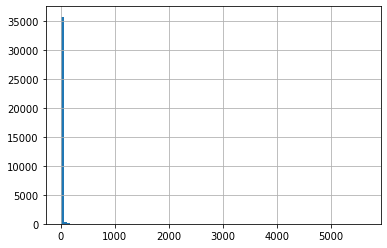

In [198]:
df.ENGAGEMENT.hist(bins=100)

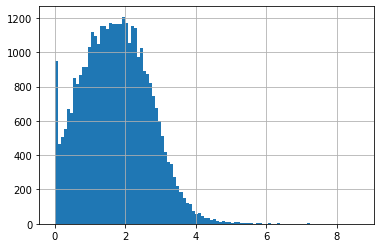

In [199]:
log_ENGAGEMENT = np.log1p(df.ENGAGEMENT)
log_ENGAGEMENT.hist(bins=100)

In [200]:
df['log_ENGAGEMENT'] = log_ENGAGEMENT

In [ ]:
df.VIDEO_VIEW_COUNT.hist(bins=100)

## Sigma cleaning

In [201]:
# we lose the most viral posts and most unviral posts
for col in df.columns:
    if df[col].dtype == 'float64':
        std = df[col].std()
        ave = df[col].mean()
        df = df.loc[df[col].between\
                               (ave - (sigma * std), ave + (sigma * std))] 
        print(f'Processing {col:10} --> {df.shape[0]:5} entities entries remain')

Processing POST_ID    --> 35200 entities entries remain
Processing ENGAGEMENT --> 35139 entities entries remain
Processing VIDEO_VIEW_COUNT -->  5757 entities entries remain
Processing log_ENGAGEMENT -->  5735 entities entries remain


In [202]:
df.describe()

,USERID,FOLLOWER,POST_ID,LIKES,COMMENTS,ENGAGEMENT,TIME,VIDEO_VIEW_COUNT,log_ENGAGEMENT
count,5.735000e+03,5.735000e+03,5.735000e+03,5735.000000,5735.000000,5735.000000,5.735000e+03,5735.000000,5735.000000
mean,1.852958e+10,4.298419e+04,2.578450e+18,192.340366,13.754141,5.753076,1.621580e+09,1499.877071,1.510929
std,1.862640e+10,1.090085e+06,1.382347e+17,2334.402938,88.551457,7.265862,1.646985e+07,12629.547529,0.868887
min,3.645060e+05,1.000000e+00,1.800000e+18,0.000000,0.000000,0.000000,1.528511e+09,0.000000,0.000000
25%,1.768334e+09,3.950000e+02,2.580000e+18,12.000000,0.000000,1.315000,1.621300e+09,51.000000,0.839407
50%,8.528752e+09,1.093000e+03,2.630000e+18,31.000000,2.000000,3.310000,1.627238e+09,154.000000,1.460938
75%,3.941743e+10,3.042000e+03,2.660000e+18,78.000000,8.000000,7.320000,1.631042e+09,490.000000,2.118662
max,4.974023e+10,3.636130e+07,2.670000e+18,134545.000000,3921.000000,63.780000,1.632339e+09,582167.000000,4.170997


## Handle NaN valus

How Many NaN values are ther in the datast?

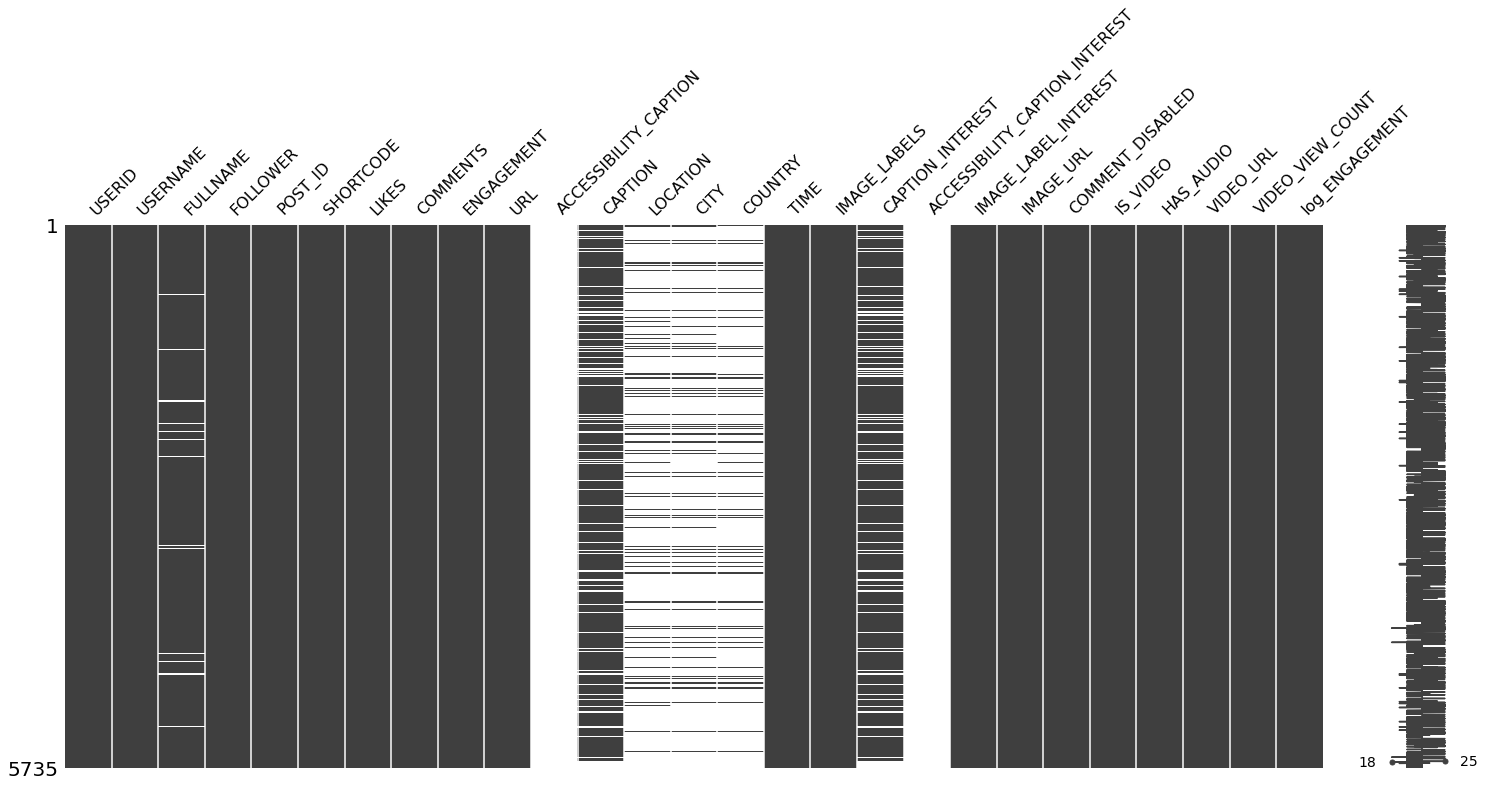

In [203]:
msno.matrix(df)

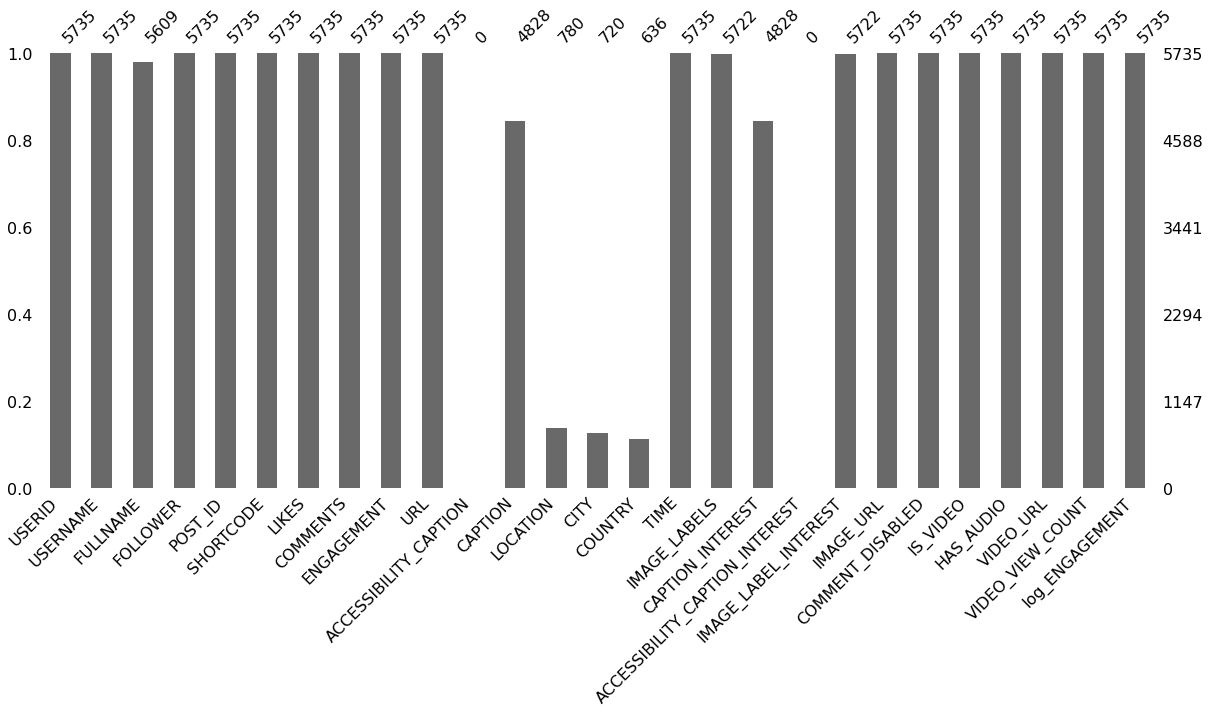

In [204]:
msno.bar(df, figsize=(20, 8))

Conert unix time to separate Date and Time columns

In [205]:
df['DATETIME'] = pd.to_datetime(df['TIME'],unit='s')

In [206]:
df['YEAR'] = pd.DatetimeIndex(df['DATETIME']).year
df['MONTH'] = pd.DatetimeIndex(df['DATETIME']).month
df['DAY'] = pd.DatetimeIndex(df['DATETIME']).day
df['DAYOFWEEK'] = pd.DatetimeIndex(df['DATETIME']).dayofweek
df['HOUR'] = pd.DatetimeIndex(df['DATETIME']).hour
df['MINUTE'] = pd.DatetimeIndex(df['DATETIME']).minute

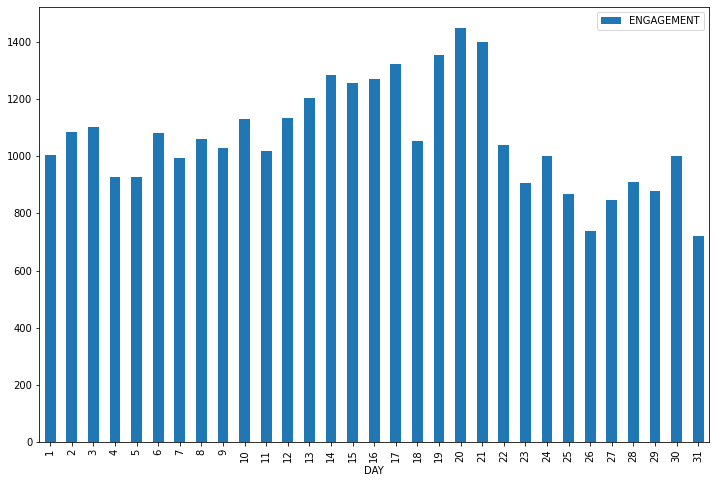

In [207]:
per_DAY = df.groupby(['DAY']).sum()
per_DAY.plot(y=["ENGAGEMENT"], kind="bar",figsize=(12,8))

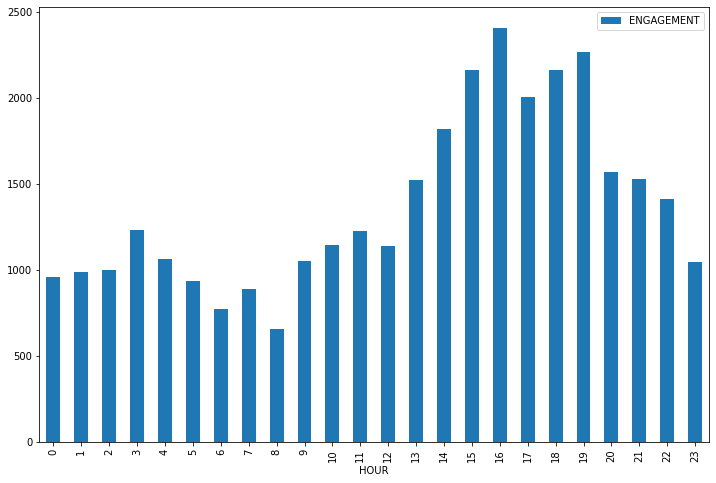

In [208]:
per_HOUR = df.groupby(['HOUR']).sum()
per_HOUR.plot(y=["ENGAGEMENT"], kind="bar",figsize=(12,8))

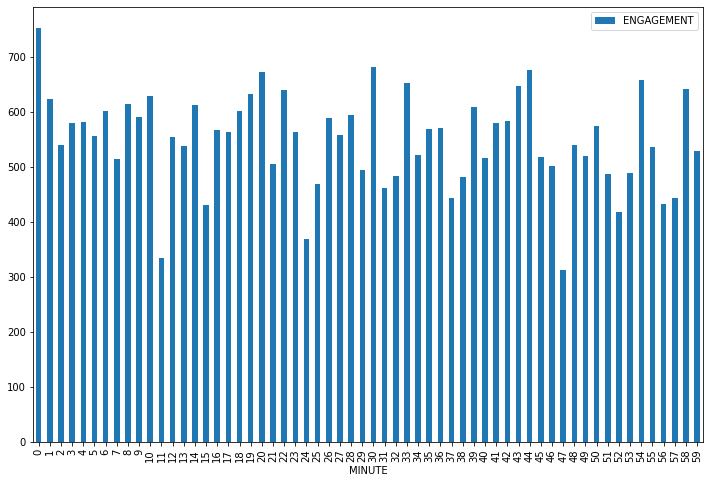

In [209]:
per_MINUTE = df.groupby(['MINUTE']).sum()
per_MINUTE.plot(y=["ENGAGEMENT"], kind="bar",figsize=(12,8))

Text(0, 0.5, 'ENGAGEMENT, LIKES, COMMENTS')

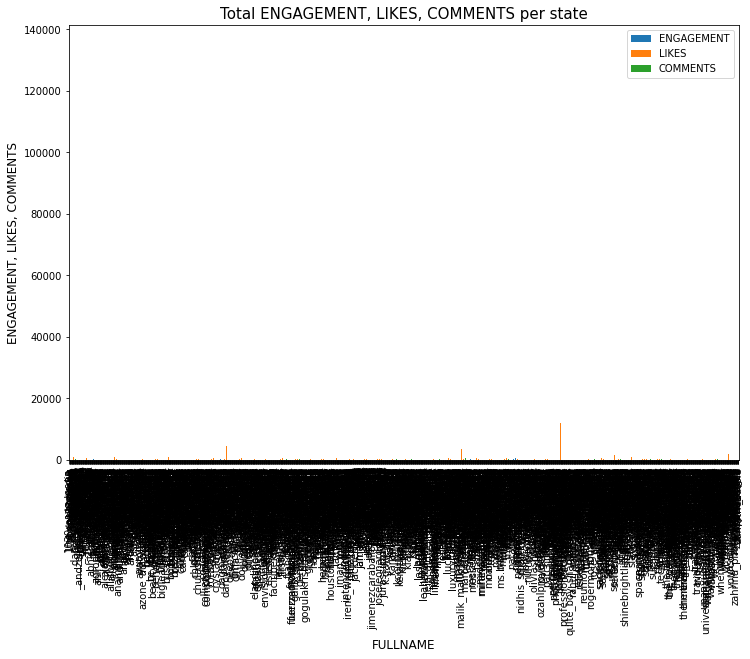

In [210]:
per_FULLNAME = df.groupby(['USERNAME']).sum()
per_FULLNAME.plot(y=["ENGAGEMENT", "LIKES","COMMENTS"], kind="bar",figsize=(12,8))

plt.title("Total ENGAGEMENT, LIKES, COMMENTS per state",fontsize=15)
plt.xlabel('FULLNAME',fontsize=12)
plt.ylabel('ENGAGEMENT, LIKES, COMMENTS',fontsize=12)

Remove column that all values are unique:

In [211]:
for col in df.columns:
    if len(df[col].unique()) == len(df):
        print(col)
        #df.drop(col,inplace=True,axis=1)

IMAGE_URL


In [212]:
df.head()

,USERID,USERNAME,FULLNAME,FOLLOWER,POST_ID,SHORTCODE,LIKES,COMMENTS,ENGAGEMENT,URL,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE_LABELS,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,IMAGE_LABEL_INTEREST,IMAGE_URL,COMMENT_DISABLED,IS_VIDEO,HAS_AUDIO,VIDEO_URL,VIDEO_VIEW_COUNT,log_ENGAGEMENT,DATETIME,YEAR,MONTH,DAY,DAYOFWEEK,HOUR,MINUTE
1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
37786,2130719135,ben.sapsford,Ben Sapsford ????????????,555,2.630000e+18,CR6w2xjhKjn,335,19,63.78,https://www.instagram.com/p/CR6w2xjhKjn,NaN,"The perfect ride, everything was just bang on! ????☀️????\n\nDropping down the Ranger path on Snowdon with @_mattefinish_ \n•\n•\n@yeticyclesuk @totalmtb @goprouk \n•\n•\n•\n#snowdonrangerpath #YetiCyclesUK #YetiCycles #YetiFan #mtn_bike_geek #ukmtb #mtbtrails #mtbcommunity #mtbadventures #british_adventure #mtbgram #mtbenduro #ridemoremtb #ridemorebikes #wheremybiketakesme #gopromtb #goprouk",Snowdon,na,United Kingdom,1627577786,"Bicycle, Bike, Vehicle, Transportation, Person, Human, Mountain Bike, Outdoors, Adventure, Leisure Activities, Slope, Bow, Nature",music,NaN,travel,https://instagram.fjap1-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/c0.90.720.720a/s640x640/225933122_818734328846605_3730593121612748953_n.jpg?_nc_ht=instagram.fjap1-1.fna.fbcdn.net&_nc_cat=101&_nc_ohc=McSUKCF8OU0AX9cMCSP&edm=ABfd0MgBAAAA&ccb=7-4&oh=ed1afbc91b2d543c5144cdb559d0210c&oe=614DA43F&_nc_sid=7bff83,no,yes,yes,https://instagram.fjap1-1.fna.fbcdn.net/v/t50.2886-16/10000000_551975696222423_8705154981883851520_n.mp4?_nc_ht=instagram.fjap1-1.fna.fbcdn.net&_nc_cat=111&_nc_ohc=3zj3q9gVcYIAX9ViHUC&edm=ABfd0MgBAAAA&ccb=7-4&oe=614DF092&oh=2c67668ad5dc6b94ce76fd437ae32e06&_nc_sid=7bff83,1212.0,4.170997,2021-07-29 16:56:26,2021,7,29,3,16,56
8851,48456666566,addey_rathor,Addey rathor,207,2.650000e+18,CTT8rCTD21V,128,2,62.80,https://www.instagram.com/p/CTT8rCTD21V,NaN,Manjeele milti nhi...????????\n#feel #lovestorysma #lnstagram,NaN,NaN,NaN,1630569501,"Clothing, Apparel, Person, Human, Face, Shorts, Plant, Grass, Pants, Boy, Tree, Outdoors, Portrait, Photography, Photo, Footwear, Shoe, Man, T-Shirt, Hat, Kid, Child, Housing, Building, Cap, Yard, Nature",music,NaN,style_fashion,https://instagram.fblr22-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/c0.280.720.720a/s640x640/241028570_269539524759029_2328444131836818006_n.jpg?_nc_ht=instagram.fblr22-1.fna.fbcdn.net&_nc_cat=105&_nc_ohc=21G9lyb9bR8AX8U_Eau&edm=ABfd0MgBAAAA&ccb=7-4&oh=b26e90c51178b3bc442bda916ecc4f7f&oe=614D7650&_nc_sid=7bff83,no,yes,yes,https://instagram.fblr22-1.fna.fbcdn.net/v/t50.2886-16/241213391_607803060210501_2073897524013977090_n.mp4?_nc_ht=instagram.fblr22-1.fna.fbcdn.net&_nc_cat=109&_nc_ohc=gZLbA-rtlJUAX_x0P0r&edm=ABfd0MgBAAAA&ccb=7-4&oe=614D5EB4&oh=bb864a74daeb24e628ec33a439e15509&_nc_sid=7bff83,31.0,4.155753,2021-09-02 07:58:21,2021,9,2,3,7,58
12920,45616003396,jpadesignco,JPA Design Co | Joanna Arcieri,116,2.660000e+18,CT7oocXrGwv,45,26,61.21,https://www.instagram.com/p/CT7oocXrGwv,NaN,"????????Today is launch day! ????????⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀\nI am so excited to announce the launch of my business, JPA Design Co! I am exclusively working with Interior Designers to provide brand strategy, branding visuals, and web design services!⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀\nMy website shows all of the details of how I can meet the needs and address the pain points designers are experiencing.⠀⠀⠀⠀⠀⠀⠀⠀⠀\nwww.jpadesignco.com⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀\nThis business has been a long time in the making and I am so excite",NaN,NaN,NaN,1631901605,"Person, Human, Computer, Electronics, Screen, Monitor, Display, Pc, LCD Screen, Id Cards, Document, Text, Desktop, Clothing, Apparel",arts_entertainment,NaN,technology_computing,https://instagram.fisu4-2.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/s640x640/242214609_1023753085039759_2886373213988330384_n.jpg?_nc_ht=instagram.fisu4-2.fna.fbcdn.net&_nc_cat=107&_nc_ohc=TP3Vb1IrqekAX_TTZth&edm=ABfd0MgBAAAA&ccb=7-4&oh=953369e372785b11b6830901306f0aeb&oe=614D914B&_nc_sid=7b

In [213]:
df.URL.head()
# SHORTCODE
# URL
# IMAGE_URL
# VIDEO_URL # Not working

1
37786    https://www.instagram.com/p/CR6w2xjhKjn
8851     https://www.instagram.com/p/CTT8rCTD21V
12920    https://www.instagram.com/p/CT7oocXrGwv
27290    https://www.instagram.com/p/CUEcA3PAaFP
16572    https://www.instagram.com/p/CNuqkQhjWfo
Name: URL, dtype: object

## Remove unneccessary columns from Dataframe

In [214]:
df.drop(['POST_ID','VIDEO_URL','SHORTCODE','IMAGE_URL','USERID','FULLNAME'],inplace=True,axis=1)

Convert columns type to characters :

In [215]:
df['COMMENT_DISABLED'].value_counts()

no     5700
yes      35
Name: COMMENT_DISABLED, dtype: int64

In [216]:
df['COMMENT_DISABLED'] = df['COMMENT_DISABLED'].map(dict(yes=1, no=0))

In [217]:
df['IS_VIDEO'] = df['IS_VIDEO'].map(dict(yes=1, no=0))

In [218]:
df['HAS_AUDIO'] = df['HAS_AUDIO'].map(dict(yes=1, no=0))

In [219]:
df[['COMMENT_DISABLED','IS_VIDEO','HAS_AUDIO']].value_counts()

COMMENT_DISABLED  IS_VIDEO  HAS_AUDIO
0                 1         1            5306
                            0             394
1                 1         1              29
                            0               6
dtype: int64

In [220]:
pd.unique(df[['COMMENT_DISABLED','IS_VIDEO','HAS_AUDIO']].values.ravel('K'))

array([0, 1])

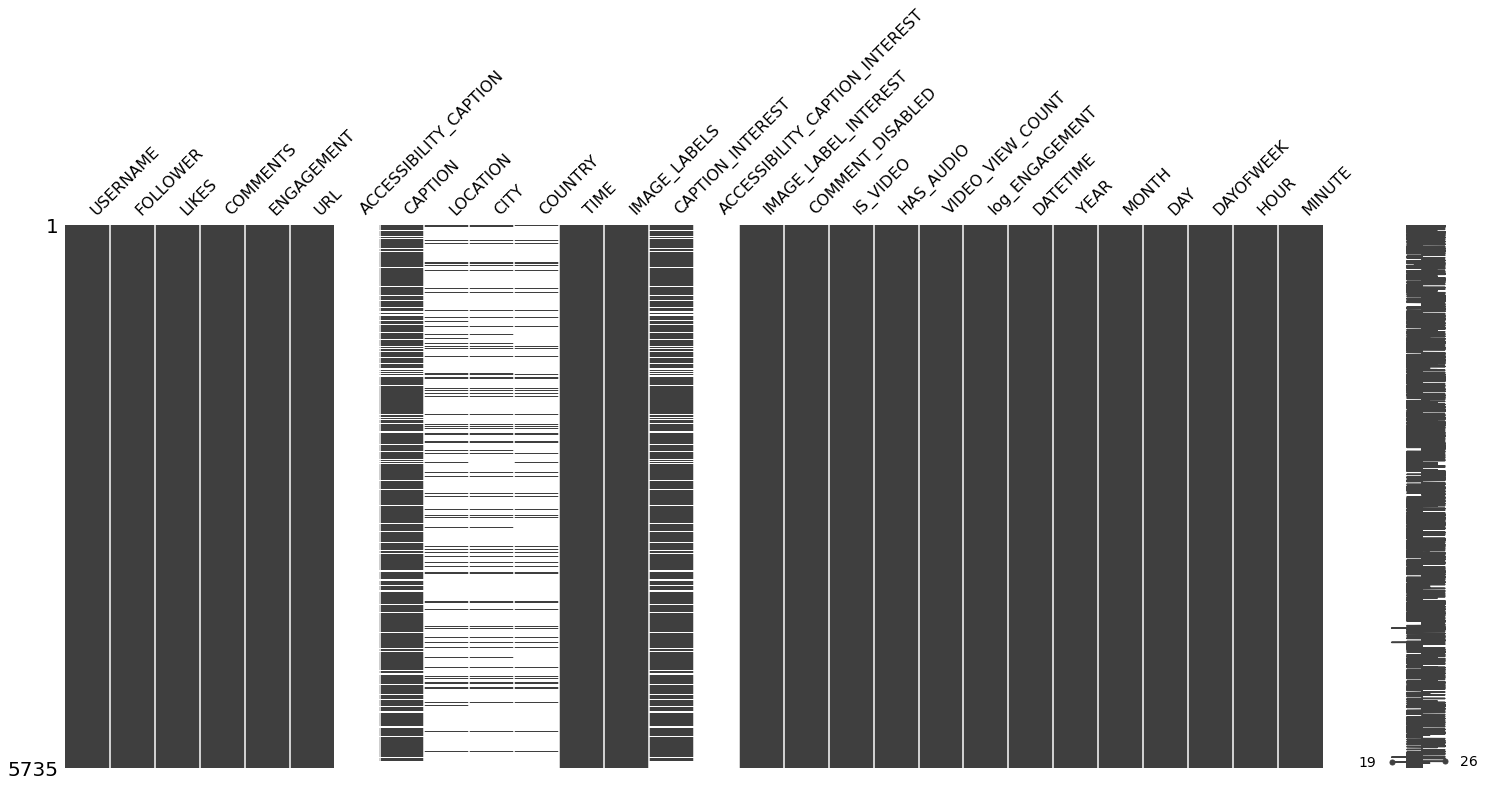

In [221]:
msno.matrix(df)

In [222]:
df.columns

Index(['USERNAME', 'FOLLOWER', 'LIKES', 'COMMENTS', 'ENGAGEMENT', 'URL',
       'ACCESSIBILITY_CAPTION', 'CAPTION', 'LOCATION', 'CITY', 'COUNTRY',
       'TIME', 'IMAGE_LABELS', 'CAPTION_INTEREST',
       'ACCESSIBILITY_CAPTION_INTEREST', 'IMAGE_LABEL_INTEREST',
       'COMMENT_DISABLED', 'IS_VIDEO', 'HAS_AUDIO', 'VIDEO_VIEW_COUNT',
       'log_ENGAGEMENT', 'DATETIME', 'YEAR', 'MONTH', 'DAY', 'DAYOFWEEK',
       'HOUR', 'MINUTE'],
      dtype='object')

Raname the index

In [223]:
df = df.rename_axis('LINE_NUM_INDEX')

Note by Eladk: we can fill location values by using a merdiction model base in the influancer and the time for the post. <BR> 
For Now, I'll just fill the columns with NULL

Replace all cases where VIDEO_VIEW_COUNT == Nan with 0. <BR> for double check i verified it with is_video column

In [224]:
df['VIDEO_VIEW_COUNT'].fillna(0, inplace=True)

Eladk note 8-Sep-2021: I still need to handle missing values in column:


*   FULLNAME
*   ACCESSIBILITY_CAPTION - specify full name, time, location, video or picture and tag
*   CAPTION - the text on this post (by the post uploader
*   LOCATION, CITY, COUNTRY - location
*   CAPTION_INTEREST -
*   ACCESSIBILITY_CAPTION_INTEREST


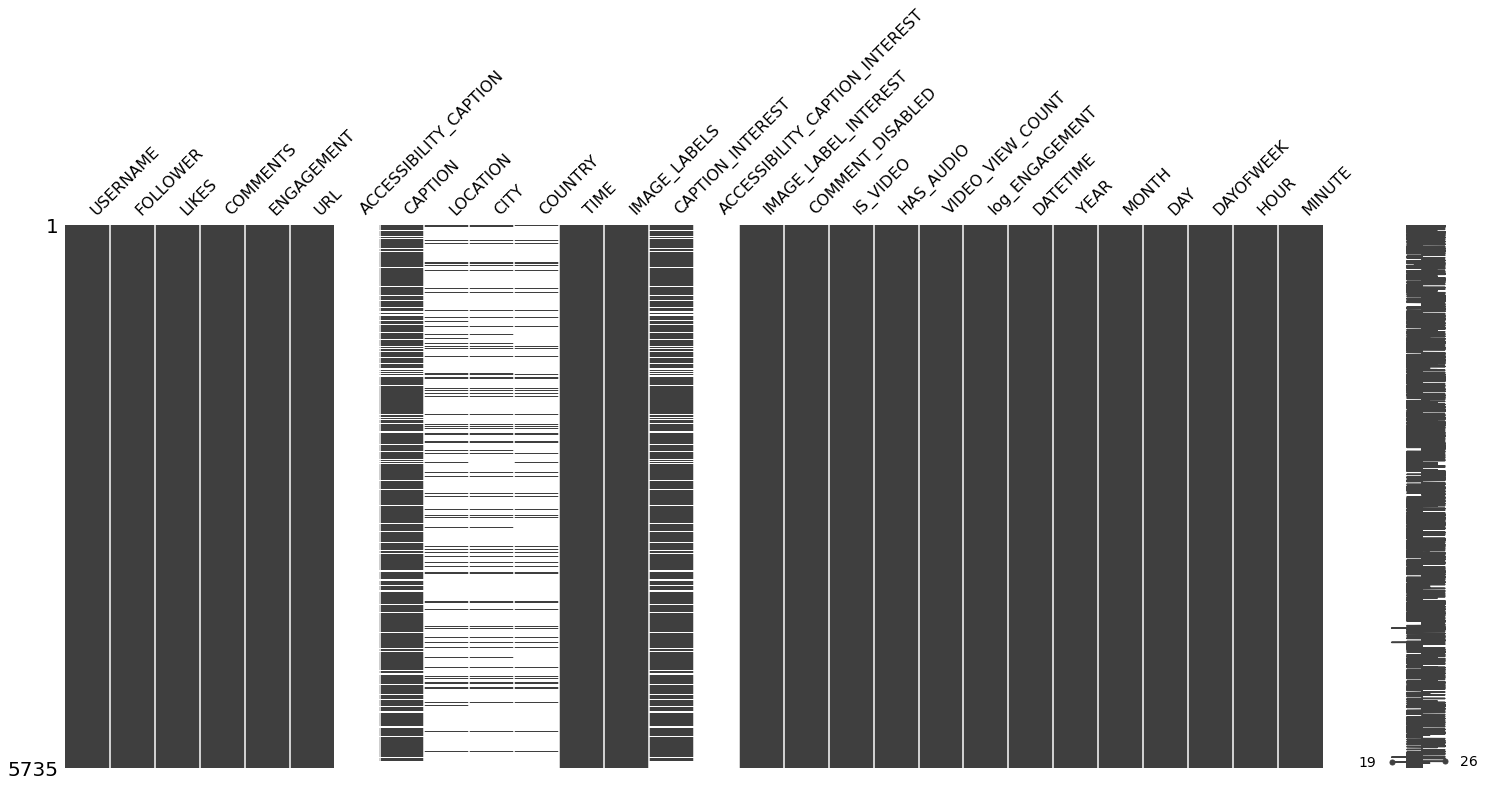

In [225]:
msno.matrix(df)

In [226]:
df.CAPTION.value_counts().sort_values(ascending=False)

????                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              25
????????                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

selecting a subset of the data:

In [227]:
df[['ACCESSIBILITY_CAPTION','CAPTION','LOCATION', 'CITY', 'COUNTRY'\
    ,'CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']].head(5)

,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST
LINE_NUM_INDEX,,,,,,,
37786,NaN,"The perfect ride, everything was just bang on! ????☀️????\n\nDropping down the Ranger path on Snowdon with @_mattefinish_ \n•\n•\n@yeticyclesuk @totalmtb @goprouk \n•\n•\n•\n#snowdonrangerpath #YetiCyclesUK #YetiCycles #YetiFan #mtn_bike_geek #ukmtb #mtbtrails #mtbcommunity #mtbadventures #british_adventure #mtbgram #mtbenduro #ridemoremtb #ridemorebikes #wheremybiketakesme #gopromtb #goprouk",Snowdon,na,United Kingdom,music,NaN
8851,NaN,Manjeele milti nhi...????????\n#feel #lovestorysma #lnstagram,NaN,NaN,NaN,music,NaN
12920,NaN,"????????Today is launch day! ????????⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀\nI am so excited to announce the launch of my business, JPA Design Co! I am exclusively working with Interior Designers to provide brand strategy, branding visuals, and web design services!⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀\nMy website shows all of the details of how I can meet the needs and address the pain points designers are experiencing.⠀⠀⠀⠀⠀⠀⠀⠀⠀\nwww.jpadesignco.com⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀\nThis business has been a long time in the making and I am so excite",NaN,NaN,NaN,arts_entertainment,NaN
27290,NaN,No.3 beat\n\nXOKbeats,"New York City, N.Y.","New York, NY, USA",United States,sports,NaN
16572,NaN,"“In every job that must be done, there is an element of fun.” -Mary Poppins\n\n#podcast #podcastersofinstagram #naturallysocialpodcast #podcastlife #podcaster #latenightpodcasting #latenightpodcastrecording",NaN,NaN,NaN,podcasts,NaN


Increase the length to a column so that we'll see all the text in a cell

In [228]:
pd.options.display.max_colwidth = 1000
df.ACCESSIBILITY_CAPTION.head(5)

LINE_NUM_INDEX
37786    NaN
8851     NaN
12920    NaN
27290    NaN
16572    NaN
Name: ACCESSIBILITY_CAPTION, dtype: object

Selecting 1 row by index (specific column only)

In [229]:
df[df.index == 1929][['URL','ACCESSIBILITY_CAPTION','DATETIME','LOCATION']] # name, 

,URL,ACCESSIBILITY_CAPTION,DATETIME,LOCATION
LINE_NUM_INDEX,,,,


In [230]:
df.columns

Index(['USERNAME', 'FOLLOWER', 'LIKES', 'COMMENTS', 'ENGAGEMENT', 'URL',
       'ACCESSIBILITY_CAPTION', 'CAPTION', 'LOCATION', 'CITY', 'COUNTRY',
       'TIME', 'IMAGE_LABELS', 'CAPTION_INTEREST',
       'ACCESSIBILITY_CAPTION_INTEREST', 'IMAGE_LABEL_INTEREST',
       'COMMENT_DISABLED', 'IS_VIDEO', 'HAS_AUDIO', 'VIDEO_VIEW_COUNT',
       'log_ENGAGEMENT', 'DATETIME', 'YEAR', 'MONTH', 'DAY', 'DAYOFWEEK',
       'HOUR', 'MINUTE'],
      dtype='object')

In [231]:
df[['CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']].head(20)

,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST
LINE_NUM_INDEX,,
37786,music,NaN
8851,music,NaN
12920,arts_entertainment,NaN
27290,sports,NaN
16572,podcasts,NaN
9159,NaN,NaN
36089,NaN,NaN
14576,style_fashion,NaN
37686,food_drink,NaN


In [232]:
df[df.index == 1932][['URL','CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']] # name, 

,URL,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST
LINE_NUM_INDEX,,,


there are 308 combination as CAPTION_INTEREST and ACCESSIBILITY_CAPTION_INTEREST

In [233]:
df.groupby(['CAPTION_INTEREST','ACCESSIBILITY_CAPTION_INTEREST']).size().sort_values(ascending=False).reset_index(name='counts').head(50)

,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,counts


there are 35 unique CAPTION_INTEREST


In [234]:
df.groupby(['CAPTION_INTEREST']).size().sort_values(ascending=False).reset_index(name='counts').head(50)

,CAPTION_INTEREST,counts
0,arts_entertainment,769
1,parenting,607
2,music,568
3,education,502
4,dating_and_relationships,367
5,humor,250
6,style_fashion,245
7,food_drink,239
8,travel,224
9,entertainment,142


there are 26 unique ACCESSIBILITY_CAPTION_INTEREST


In [235]:
df.groupby(['ACCESSIBILITY_CAPTION_INTEREST']).size().sort_values(ascending=False).reset_index(name='counts').head(30)

,ACCESSIBILITY_CAPTION_INTEREST,counts


For Now (Eladk 2021-Sep-11) I'll fill every NaN with Null

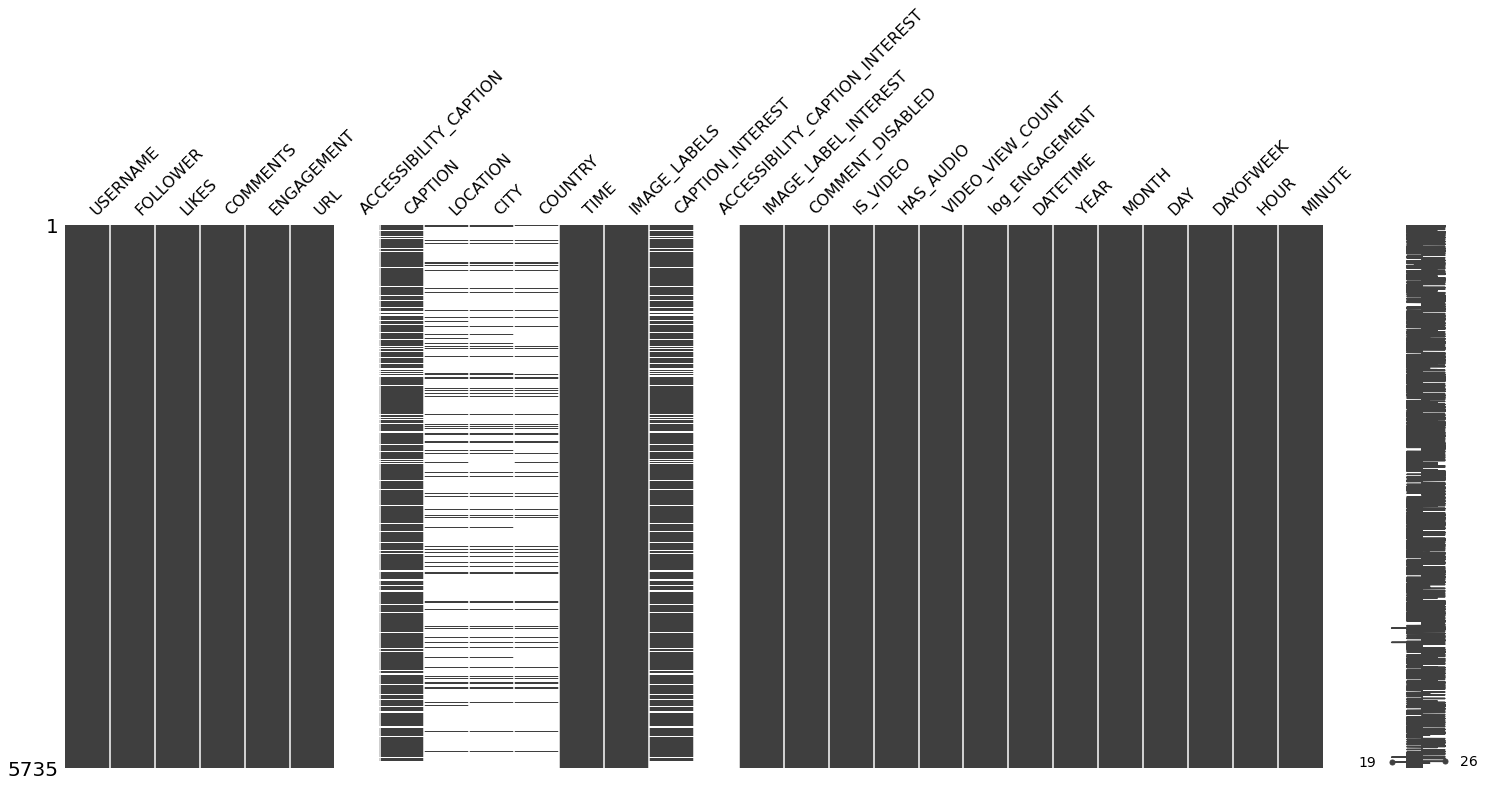

In [236]:
msno.matrix(df)

In [237]:
#https://datatofish.com/rows-with-nan-pandas-dataframe/
#len(df[df['FULLNAME'].isna()]) # 126 #849
#df[df['FULLNAME'].isnull()]
#df[df.isna().any(axis=1)] # len = 4020
# df[df.isnull().any(axis=1)]

In [238]:
for col in df.columns:
    if len(df[df[col].isnull()]) > 0:
      df[col] = df[col].fillna('Null')
      print(col)

ACCESSIBILITY_CAPTION
CAPTION
LOCATION
CITY
COUNTRY
IMAGE_LABELS
CAPTION_INTEREST
ACCESSIBILITY_CAPTION_INTEREST
IMAGE_LABEL_INTEREST


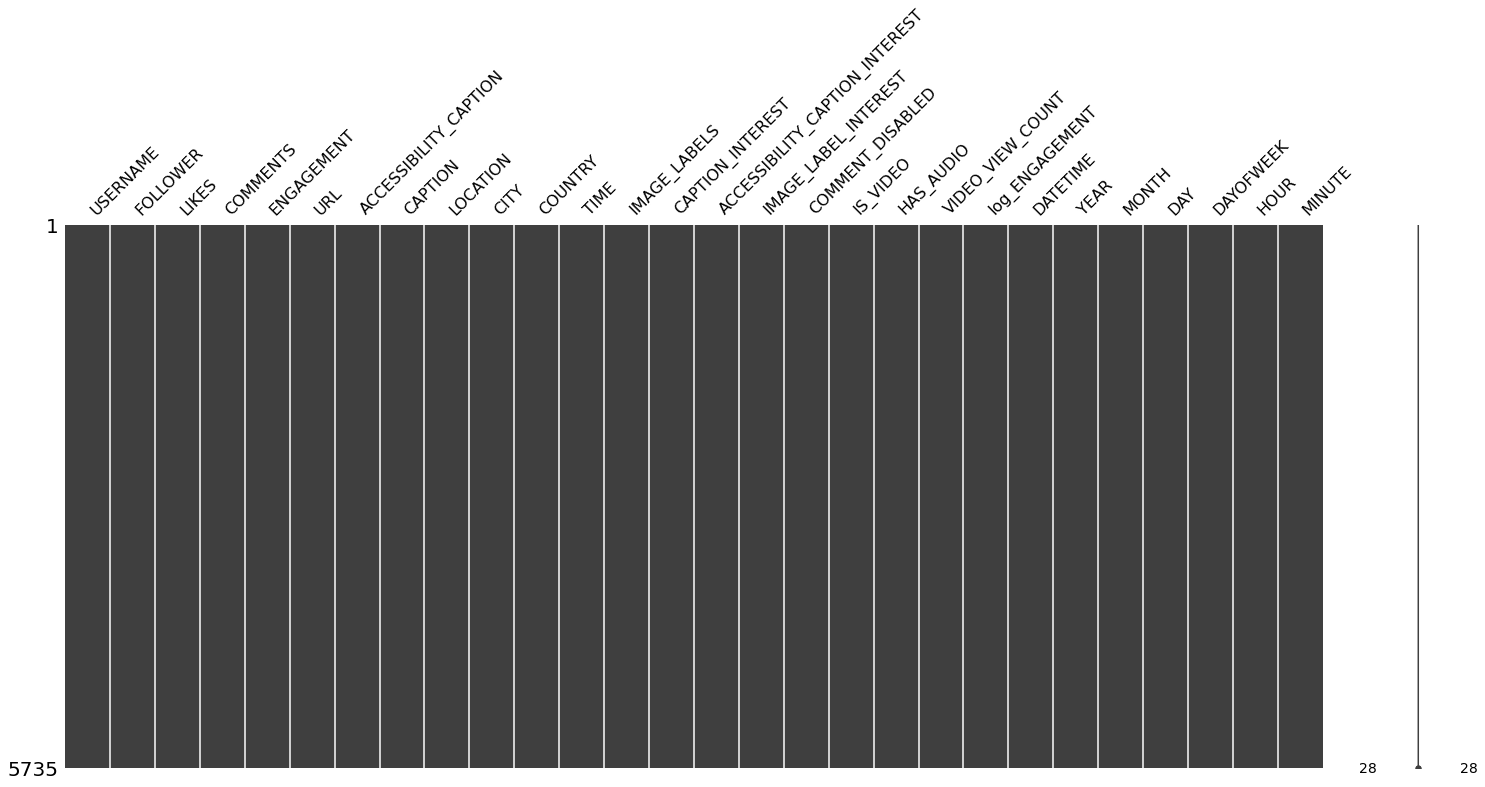

In [239]:
msno.matrix(df)

In [240]:
df.IMAGE_LABEL_INTEREST.unique()

array(['travel', 'style_fashion', 'technology_computing', 'business',
       'home_garden', 'cars_motorcycles', 'entertainment', 'sports',
       'events', 'food_drink', 'legal', 'arts_entertainment', 'music',
       'pets', 'dating_and_relationships', 'podcasts', 'movies',
       'fitness', 'Null', 'books_literature', 'education', 'weddings',
       'parenting', 'gaming', 'comic_books', 'health', 'politics',
       'accessories', 'baking_cooking', 'hobbies_interests', 'news',
       'finance', 'chef'], dtype=object)

In [241]:
df.IMAGE_LABEL_INTEREST.value_counts()

style_fashion               1683
arts_entertainment           992
travel                       703
business                     362
food_drink                   338
movies                       220
technology_computing         208
sports                       158
home_garden                  133
entertainment                121
music                        114
pets                         107
events                        90
parenting                     86
fitness                       65
health                        40
books_literature              39
legal                         37
weddings                      34
hobbies_interests             32
politics                      32
education                     29
dating_and_relationships      23
podcasts                      18
news                          17
cars_motorcycles              16
Null                          13
gaming                        11
baking_cooking                 5
accessories                    4
comic_book

In [242]:
IMAGE_LABEL_INTEREST = df.groupby(['IMAGE_LABEL_INTEREST']).head(10)
print(IMAGE_LABEL_INTEREST)

                        USERNAME  FOLLOWER  LIKES  ...  DAYOFWEEK  HOUR MINUTE
LINE_NUM_INDEX                                     ...                        
37786               ben.sapsford       555    335  ...          3    16     56
8851                addey_rathor       207    128  ...          3     7     58
12920                jpadesignco       116     45  ...          4    18      0
27290                   xokbeats       159     71  ...          1     3     55
16572             naturallysopod       179    103  ...          4    13     50
...                          ...       ...    ...  ...        ...   ...    ...
36406             clapspatriamia      6446     35  ...          4     0     42
18104               ayrton.lee19      1092      5  ...          1     2     36
16341               masalamommas      3009     12  ...          1    18     27
12930           mohammad_ilaiyan       256      1  ...          2    20     54
29334                  kalibr_ru     25694      0  .

## Create bins (buckets) of Likes, Comment Engagement so we can use a classification model

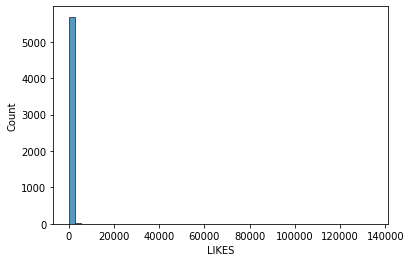

In [243]:
sns.histplot(x = df.LIKES,bins=50)

In [244]:
bins_LIKES=[min(df.LIKES)-1,15,40,200,400,max(df.LIKES)+1]
pd.cut(x=df.LIKES, bins=5).value_counts()
pd.cut(x=df.LIKES, bins=bins_LIKES, labels=bin_labels,
       ordered=True).value_counts()

High         1881
Low          1854
Medium       1436
Extreme       305
Very High     259
Name: LIKES, dtype: int64

In [245]:
df['LIKES_RANK'] = pd.cut(x=df.LIKES, bins=bins_LIKES, labels=bin_labels,
       ordered=True)

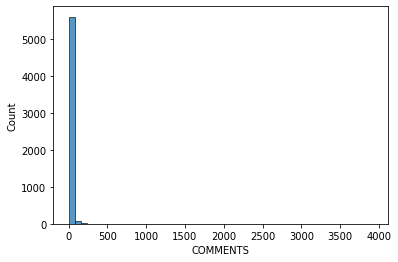

In [246]:
sns.histplot(x = df.COMMENTS,bins=50)

In [247]:
len(df.COMMENTS) #3921

5735

In [248]:
bins_COMMENTS=[min(df.COMMENTS)-1,1,5,40,60,max(df.COMMENTS)]
#pd.cut(x=df.COMMENTS, bins=5).value_counts()
pd.cut(x=df.COMMENTS, bins=bins_COMMENTS#, labels=labels 
        ,ordered=True).value_counts()

(-1, 1]       2671
(5, 40]       1488
(1, 5]        1261
(60, 3921]     195
(40, 60]       120
Name: COMMENTS, dtype: int64

In [249]:
df['COMMENTS_RANK'] = pd.cut(x=df.COMMENTS, bins=bins_COMMENTS, labels=bin_labels 
        ,ordered=True)

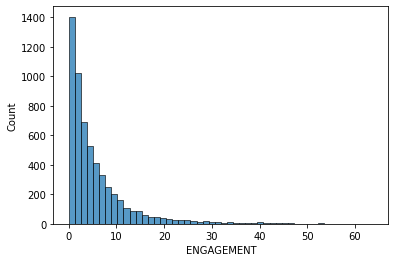

In [250]:
sns.histplot(x = df.ENGAGEMENT,bins=50)

In [251]:
bins_ENGAGEMENT=[min(df.ENGAGEMENT)-1,1.5,3.5,10,15,max(df.ENGAGEMENT)]
pd.cut(x=df.ENGAGEMENT, bins=5, labels=bin_labels, ordered=True).value_counts()
pd.cut(x=df.ENGAGEMENT, bins=bins_ENGAGEMENT, labels=bin_labels, ordered=True).value_counts()

High         1829
Low          1593
Medium       1380
Extreme       473
Very High     460
Name: ENGAGEMENT, dtype: int64

In [252]:
df['ENGAGEMENT_RANK'] = pd.cut(x=df.ENGAGEMENT, bins=bins_ENGAGEMENT, labels=bin_labels, ordered=True)

In [253]:
df['ENGAGEMENT_RANK']

LINE_NUM_INDEX
37786    Extreme
8851     Extreme
12920    Extreme
27290    Extreme
16572    Extreme
          ...   
36897        Low
36930        Low
37059        Low
37088        Low
37298        Low
Name: ENGAGEMENT_RANK, Length: 5735, dtype: category
Categories (5, object): ['Low' < 'Medium' < 'High' < 'Very High' < 'Extreme']

Convert Rank to Code using Dictionary 

In [254]:
df.columns

Index(['USERNAME', 'FOLLOWER', 'LIKES', 'COMMENTS', 'ENGAGEMENT', 'URL',
       'ACCESSIBILITY_CAPTION', 'CAPTION', 'LOCATION', 'CITY', 'COUNTRY',
       'TIME', 'IMAGE_LABELS', 'CAPTION_INTEREST',
       'ACCESSIBILITY_CAPTION_INTEREST', 'IMAGE_LABEL_INTEREST',
       'COMMENT_DISABLED', 'IS_VIDEO', 'HAS_AUDIO', 'VIDEO_VIEW_COUNT',
       'log_ENGAGEMENT', 'DATETIME', 'YEAR', 'MONTH', 'DAY', 'DAYOFWEEK',
       'HOUR', 'MINUTE', 'LIKES_RANK', 'COMMENTS_RANK', 'ENGAGEMENT_RANK'],
      dtype='object')

In [255]:
df.LIKES_RANK.unique()

['Very High', 'High', 'Extreme', 'Low', 'Medium']
Categories (5, object): ['Low' < 'Medium' < 'High' < 'Very High' < 'Extreme']

In [256]:
df['COMMENTS_RANK']

LINE_NUM_INDEX
37786      High
8851     Medium
12920      High
27290      High
16572    Medium
          ...  
36897       Low
36930       Low
37059       Low
37088       Low
37298       Low
Name: COMMENTS_RANK, Length: 5735, dtype: category
Categories (5, object): ['Low' < 'Medium' < 'High' < 'Very High' < 'Extreme']

In [257]:
map_dict_rank = {'Low':0.0 , 'Medium':1.0, 'High':2.0, 'Very High':3.0, 'Extreme':4.0}
map_dict_rank

{'Extreme': 4.0, 'High': 2.0, 'Low': 0.0, 'Medium': 1.0, 'Very High': 3.0}

In [258]:
df['LIKES_RANK_INT'] =  df['LIKES_RANK'].map(map_dict_rank).astype(int)

In [259]:
df['COMMENTS_RANK_INT'] =   df['COMMENTS_RANK'].map(map_dict_rank).astype(int)

In [260]:
df['ENGAGEMENT_RANK_INT'] =   df['ENGAGEMENT_RANK'].map(map_dict_rank).astype(int)

In [261]:
df[['LIKES_RANK','LIKES_RANK_INT']].value_counts().sort_index()

LIKES_RANK  LIKES_RANK_INT
Low         0                 1854
Medium      1                 1436
High        2                 1881
Very High   3                  259
Extreme     4                  305
dtype: int64

In [262]:
df[['COMMENTS_RANK','COMMENTS_RANK_INT']].value_counts().sort_index()

COMMENTS_RANK  COMMENTS_RANK_INT
Low            0                    2671
Medium         1                    1261
High           2                    1488
Very High      3                     120
Extreme        4                     195
dtype: int64

In [263]:
df[['ENGAGEMENT_RANK','ENGAGEMENT_RANK_INT']].value_counts().sort_index()

ENGAGEMENT_RANK  ENGAGEMENT_RANK_INT
Low              0                      1593
Medium           1                      1380
High             2                      1829
Very High        3                       460
Extreme          4                       473
dtype: int64

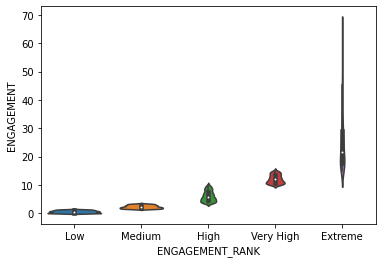

In [264]:
p = sns.violinplot(x='ENGAGEMENT_RANK', y='ENGAGEMENT', 
                    #order=cut_order, 
                    data=df)

## Eladk 28-Sep-2021, more bucketing



1.  VIDEO_VIEW_COUNT          41.148879
2.  FOLLOWER                  35.852012
3.  USERNAME_OBJECT_AS_INT    17.961764
4.  CAPTION_OBJECT_AS_INT      3.558228
5.  HOUR                       1.201713
6.  MINUTE                     0.277403



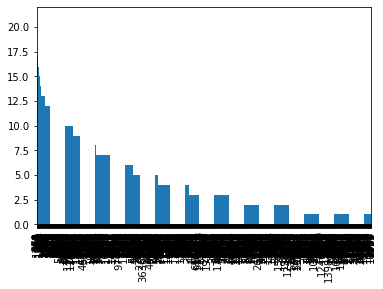

In [265]:
df.FOLLOWER.value_counts().sort_values(ascending=False).plot.bar()
#.reindex()

## Replacing Charecters  with Number uning OrdinalEncoder

In [266]:
# list of char / object columns

In [267]:
df.dtypes

USERNAME                                  object
FOLLOWER                                   int64
LIKES                                      int64
COMMENTS                                   int64
ENGAGEMENT                               float64
URL                                       object
ACCESSIBILITY_CAPTION                     object
CAPTION                                   object
LOCATION                                  object
CITY                                      object
COUNTRY                                   object
TIME                                       int64
IMAGE_LABELS                              object
CAPTION_INTEREST                          object
ACCESSIBILITY_CAPTION_INTEREST            object
IMAGE_LABEL_INTEREST                      object
COMMENT_DISABLED                           int64
IS_VIDEO                                   int64
HAS_AUDIO                                  int64
VIDEO_VIEW_COUNT                         float64
log_ENGAGEMENT      

In [268]:
df.select_dtypes(include=['object']).dtypes

USERNAME                          object
URL                               object
ACCESSIBILITY_CAPTION             object
CAPTION                           object
LOCATION                          object
CITY                              object
COUNTRY                           object
IMAGE_LABELS                      object
CAPTION_INTEREST                  object
ACCESSIBILITY_CAPTION_INTEREST    object
IMAGE_LABEL_INTEREST              object
dtype: object

In [269]:
df.select_dtypes(include=['object']).dtypes.index

Index(['USERNAME', 'URL', 'ACCESSIBILITY_CAPTION', 'CAPTION', 'LOCATION',
       'CITY', 'COUNTRY', 'IMAGE_LABELS', 'CAPTION_INTEREST',
       'ACCESSIBILITY_CAPTION_INTEREST', 'IMAGE_LABEL_INTEREST'],
      dtype='object')

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5735 entries, 37786 to 37298
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   USERNAME                        5735 non-null   object        
 1   FOLLOWER                        5735 non-null   int64         
 2   LIKES                           5735 non-null   int64         
 3   COMMENTS                        5735 non-null   int64         
 4   ENGAGEMENT                      5735 non-null   float64       
 5   URL                             5735 non-null   object        
 6   ACCESSIBILITY_CAPTION           5735 non-null   object        
 7   CAPTION                         5735 non-null   object        
 8   LOCATION                        5735 non-null   object        
 9   CITY                            5735 non-null   object        
 10  COUNTRY                         5735 non-null   object        
 11 

In [271]:
enc = OrdinalEncoder()

Many columns:

In [272]:
for col in df.select_dtypes(include=['object']).dtypes.index:
#for col in ['USERNAME','FULLNAME']:
  #col_list = pd.DataFrame(df[col].unique())
  #col_list.rename(columns = {0:col},inplace=True)
  #col_list.rename(columns = {0:col},inplace=True)
  enc.fit(df[[col]])
  df[col + '_OBJECT_AS_INT'] = enc.transform(df[[col]])
  #print(col)

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5735 entries, 37786 to 37298
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   USERNAME                                      5735 non-null   object        
 1   FOLLOWER                                      5735 non-null   int64         
 2   LIKES                                         5735 non-null   int64         
 3   COMMENTS                                      5735 non-null   int64         
 4   ENGAGEMENT                                    5735 non-null   float64       
 5   URL                                           5735 non-null   object        
 6   ACCESSIBILITY_CAPTION                         5735 non-null   object        
 7   CAPTION                                       5735 non-null   object        
 8   LOCATION                                      5735 non-null   o

In [274]:
df.head(2)

,USERNAME,FOLLOWER,LIKES,COMMENTS,ENGAGEMENT,URL,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE_LABELS,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,IMAGE_LABEL_INTEREST,COMMENT_DISABLED,IS_VIDEO,HAS_AUDIO,VIDEO_VIEW_COUNT,log_ENGAGEMENT,DATETIME,YEAR,MONTH,DAY,DAYOFWEEK,HOUR,MINUTE,LIKES_RANK,COMMENTS_RANK,ENGAGEMENT_RANK,LIKES_RANK_INT,COMMENTS_RANK_INT,ENGAGEMENT_RANK_INT,USERNAME_OBJECT_AS_INT,URL_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_OBJECT_AS_INT,CAPTION_OBJECT_AS_INT,LOCATION_OBJECT_AS_INT,CITY_OBJECT_AS_INT,COUNTRY_OBJECT_AS_INT,IMAGE_LABELS_OBJECT_AS_INT,CAPTION_INTEREST_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT,IMAGE_LABEL_INTEREST_OBJECT_AS_INT
LINE_NUM_INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
37786,ben.sapsford,555,335,19,63.78,https://www.instagram.com/p/CR6w2xjhKjn,Null,"The perfect ride, everything was just bang on! ????☀️????\n\nDropping down the Ranger path on Snowdon with @_mattefinish_ \n•\n•\n@yeticyclesuk @totalmtb @goprouk \n•\n•\n•\n#snowdonrangerpath #YetiCyclesUK #YetiCycles #YetiFan #mtn_bike_geek #ukmtb #mtbtrails #mtbcommunity #mtbadventures #british_adventure #mtbgram #mtbenduro #ridemoremtb #ridemorebikes #wheremybiketakesme #gopromtb #goprouk",Snowdon,na,United Kingdom,1627577786,"Bicycle, Bike, Vehicle, Transportation, Person, Human, Mountain Bike, Outdoors, Adventure, Leisure Activities, Slope, Bow, Nature",music,Null,travel,0,1,1,1212.0,4.170997,2021-07-29 16:56:26,2021,7,29,3,16,56,Very High,High,Extreme,3,2,4,220.0,2644.0,0.0,3631.0,358.0,330.0,48.0,169.0,25.0,0.0,31.0
8851,addey_rathor,207,128,2,62.80,https://www.instagram.com/p/CTT8rCTD21V,Null,Manjeele milti nhi...????????\n#feel #lovestorysma #lnstagram,Null,Null,Null,1630569501,"Clothing, Apparel, Person, Human, Face, Shorts, Plant, Grass, Pants, Boy, Tree, Outdoors, Portrait, Photography, Photo, Footwear, Shoe, Man, T-Shirt, Hat, Kid, Child, Housing, Building, Cap, Yard, Nature",music,Null,style_fashion,0,1,1,31.0,4.155753,2021-09-02 07:58:21,2021,9,2,3,7,58,High,Medium,Extreme,2,1,4,65.0,4394.0,0.0,2649.0,276.0,204.0,35.0,624.0,25.0,0.0,29.0


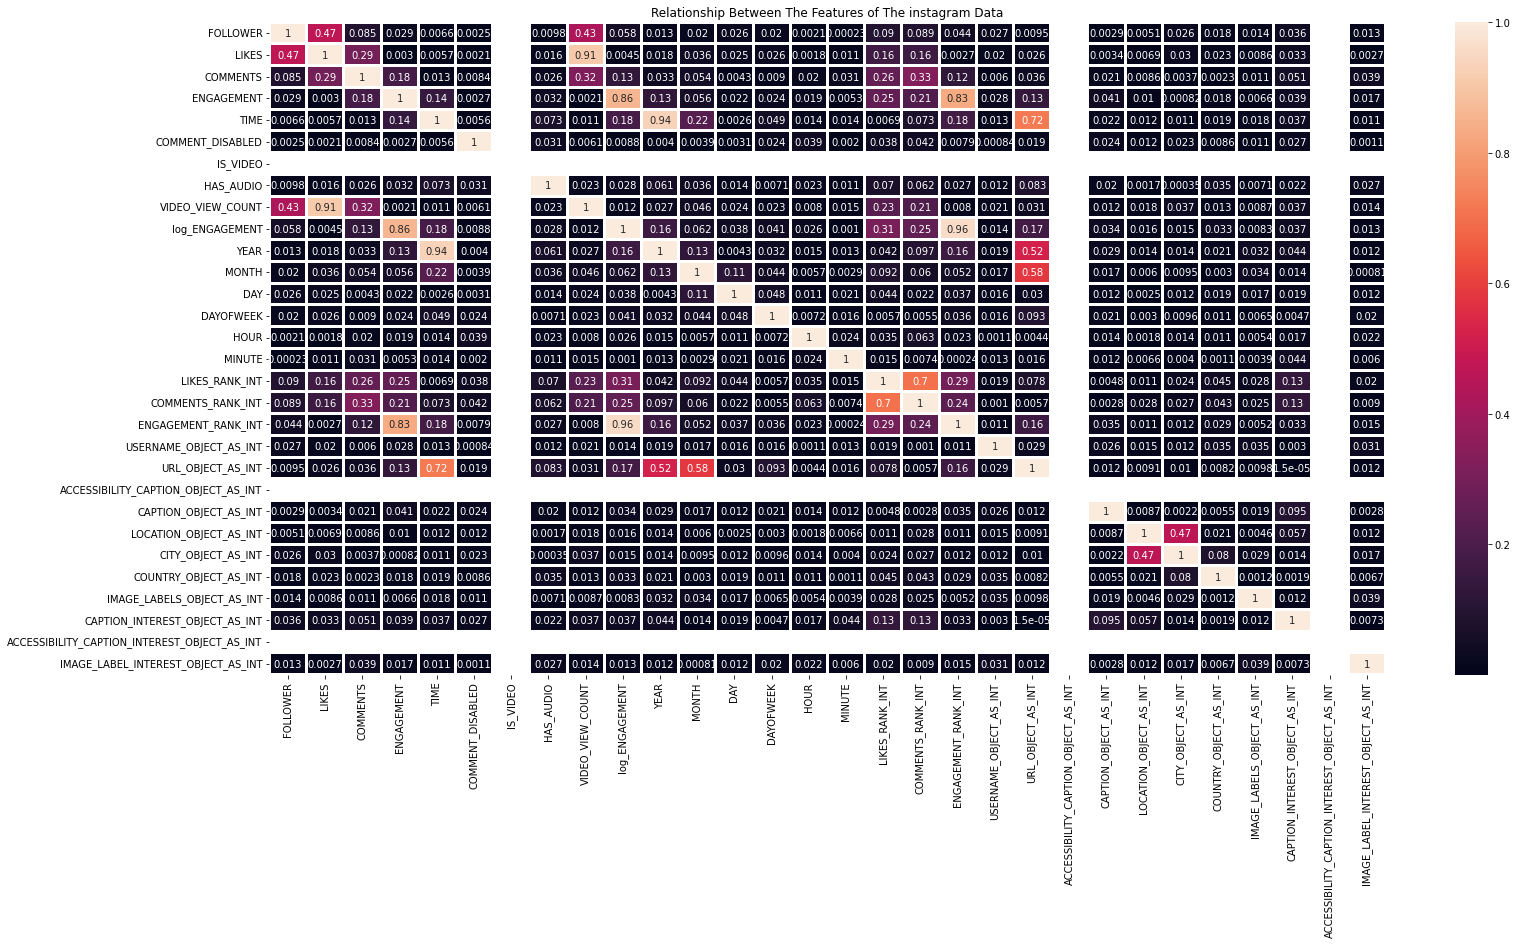

In [275]:
plt.figure(figsize=(25,12))
plt.title("Relationship Between The Features of The instagram Data")
sns.heatmap(df.corr().abs(), annot=True, linewidths = 2, linecolor = "white")

In [276]:
# %%time 
# df = df.select_dtypes(include=np.number)
# sns.pairplot(df ,height=1.8) # takes about 5 min.

## More EDA

In [277]:
df.head(2)

,USERNAME,FOLLOWER,LIKES,COMMENTS,ENGAGEMENT,URL,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE_LABELS,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,IMAGE_LABEL_INTEREST,COMMENT_DISABLED,IS_VIDEO,HAS_AUDIO,VIDEO_VIEW_COUNT,log_ENGAGEMENT,DATETIME,YEAR,MONTH,DAY,DAYOFWEEK,HOUR,MINUTE,LIKES_RANK,COMMENTS_RANK,ENGAGEMENT_RANK,LIKES_RANK_INT,COMMENTS_RANK_INT,ENGAGEMENT_RANK_INT,USERNAME_OBJECT_AS_INT,URL_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_OBJECT_AS_INT,CAPTION_OBJECT_AS_INT,LOCATION_OBJECT_AS_INT,CITY_OBJECT_AS_INT,COUNTRY_OBJECT_AS_INT,IMAGE_LABELS_OBJECT_AS_INT,CAPTION_INTEREST_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT,IMAGE_LABEL_INTEREST_OBJECT_AS_INT
LINE_NUM_INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
37786,ben.sapsford,555,335,19,63.78,https://www.instagram.com/p/CR6w2xjhKjn,Null,"The perfect ride, everything was just bang on! ????☀️????\n\nDropping down the Ranger path on Snowdon with @_mattefinish_ \n•\n•\n@yeticyclesuk @totalmtb @goprouk \n•\n•\n•\n#snowdonrangerpath #YetiCyclesUK #YetiCycles #YetiFan #mtn_bike_geek #ukmtb #mtbtrails #mtbcommunity #mtbadventures #british_adventure #mtbgram #mtbenduro #ridemoremtb #ridemorebikes #wheremybiketakesme #gopromtb #goprouk",Snowdon,na,United Kingdom,1627577786,"Bicycle, Bike, Vehicle, Transportation, Person, Human, Mountain Bike, Outdoors, Adventure, Leisure Activities, Slope, Bow, Nature",music,Null,travel,0,1,1,1212.0,4.170997,2021-07-29 16:56:26,2021,7,29,3,16,56,Very High,High,Extreme,3,2,4,220.0,2644.0,0.0,3631.0,358.0,330.0,48.0,169.0,25.0,0.0,31.0
8851,addey_rathor,207,128,2,62.80,https://www.instagram.com/p/CTT8rCTD21V,Null,Manjeele milti nhi...????????\n#feel #lovestorysma #lnstagram,Null,Null,Null,1630569501,"Clothing, Apparel, Person, Human, Face, Shorts, Plant, Grass, Pants, Boy, Tree, Outdoors, Portrait, Photography, Photo, Footwear, Shoe, Man, T-Shirt, Hat, Kid, Child, Housing, Building, Cap, Yard, Nature",music,Null,style_fashion,0,1,1,31.0,4.155753,2021-09-02 07:58:21,2021,9,2,3,7,58,High,Medium,Extreme,2,1,4,65.0,4394.0,0.0,2649.0,276.0,204.0,35.0,624.0,25.0,0.0,29.0


## Feature Engneering

## Image captioning

Eladk 2021-Sep-17, we need to:


*   convert y colum to 5 classes so we can have a classification problem and not a regresion model
*   check if the data is inbalance (so we need to use stratify)



# Split the Data

select only int and float column types to X 
seletc LIKES, COMMENTS, ENGAGEMENT as y

In [278]:
df.columns

Index(['USERNAME', 'FOLLOWER', 'LIKES', 'COMMENTS', 'ENGAGEMENT', 'URL',
       'ACCESSIBILITY_CAPTION', 'CAPTION', 'LOCATION', 'CITY', 'COUNTRY',
       'TIME', 'IMAGE_LABELS', 'CAPTION_INTEREST',
       'ACCESSIBILITY_CAPTION_INTEREST', 'IMAGE_LABEL_INTEREST',
       'COMMENT_DISABLED', 'IS_VIDEO', 'HAS_AUDIO', 'VIDEO_VIEW_COUNT',
       'log_ENGAGEMENT', 'DATETIME', 'YEAR', 'MONTH', 'DAY', 'DAYOFWEEK',
       'HOUR', 'MINUTE', 'LIKES_RANK', 'COMMENTS_RANK', 'ENGAGEMENT_RANK',
       'LIKES_RANK_INT', 'COMMENTS_RANK_INT', 'ENGAGEMENT_RANK_INT',
       'USERNAME_OBJECT_AS_INT', 'URL_OBJECT_AS_INT',
       'ACCESSIBILITY_CAPTION_OBJECT_AS_INT', 'CAPTION_OBJECT_AS_INT',
       'LOCATION_OBJECT_AS_INT', 'CITY_OBJECT_AS_INT', 'COUNTRY_OBJECT_AS_INT',
       'IMAGE_LABELS_OBJECT_AS_INT', 'CAPTION_INTEREST_OBJECT_AS_INT',
       'ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT',
       'IMAGE_LABEL_INTEREST_OBJECT_AS_INT'],
      dtype='object')

In [279]:
X = df.select_dtypes(include=['number'])
X.drop(['LIKES','COMMENTS','ENGAGEMENT','log_ENGAGEMENT'], axis=1, inplace=True) #['LIKES','COMMENTS','ENGAGEMENT']

In [280]:
X.drop(['LIKES_RANK_INT','COMMENTS_RANK_INT','ENGAGEMENT_RANK_INT'], axis=1, inplace=True) #['LIKES','COMMENTS','ENGAGEMENT']

In [281]:
y = df['ENGAGEMENT']
y1 = df['LIKES']
y2 = df['COMMENTS']
y3 = df['log_ENGAGEMENT']
y_ENGAGEMENT_RANK_INT = df['ENGAGEMENT_RANK_INT']
y_LIKES_RANK_INT = df['LIKES_RANK_INT']
y_COMMENTS_RANK_INT = df['COMMENTS_RANK_INT']

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y3, train_size = train_size\
                           , random_state = rand_state)#, stratify = df.ENGAGEMENT)

In [283]:
print('Training Features Shape:', X_train.shape)
print('Training Labels (y) Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels(y) Shape:', y_test.shape)

Training Features Shape: (4301, 23)
Training Labels (y) Shape: (4301,)
Testing Features Shape: (1434, 23)
Testing Labels(y) Shape: (1434,)


# Mechine Learning  Model

## Appling First1 Model - KNN model

In [284]:
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = (mse(y_test,pred))**0.5 #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.0681497045913442
RMSE value for k=  2 is: 0.9475451009442433
RMSE value for k=  3 is: 0.9064550792136506
RMSE value for k=  4 is: 0.880519511334632
RMSE value for k=  5 is: 0.87442297744776
RMSE value for k=  6 is: 0.8638413272748736
RMSE value for k=  7 is: 0.8617888905597845
RMSE value for k=  8 is: 0.8578606499216741
RMSE value for k=  9 is: 0.8471472242129062
RMSE value for k=  10 is: 0.8467204880253008
RMSE value for k=  11 is: 0.8450398400722148
RMSE value for k=  12 is: 0.8452889226679923
RMSE value for k=  13 is: 0.8466546423514115
RMSE value for k=  14 is: 0.846204718926827
RMSE value for k=  15 is: 0.8438881845377834
RMSE value for k=  16 is: 0.8437516651576185
RMSE value for k=  17 is: 0.8429702580542503
RMSE value for k=  18 is: 0.842977015925373
RMSE value for k=  19 is: 0.8425932774346592
RMSE value for k=  20 is: 0.8423403518803941
RMSE value for k=  21 is: 0.8440845890923205
RMSE value for k=  22 is: 0.8444944181745282
RMSE value for k=  23 is

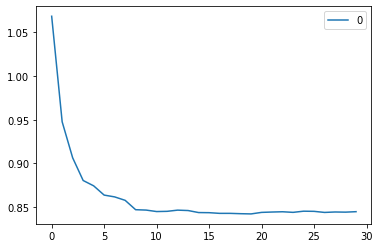

In [285]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [286]:
min_mse_k = min(rmse_val)
min_index = rmse_val.index(min_mse_k)
print(min_index, min_mse_k)

19 0.8423403518803941


In [287]:
neighbor = min_index
knn_model_1 = KNeighborsRegressor(n_neighbors=neighbor).fit(X_train, y_train)

In [288]:
y_train_pred = knn_model_1.predict(X_train)

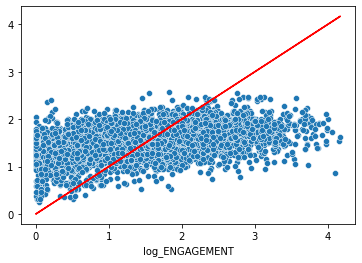

In [289]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')

In [290]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_train[-150:]))), y=y_train[-150:],
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_train_pred[-150:]))), y=y_train_pred[-150:],
                         mode='lines',
                         name='True value'))

fig.show()

## Validating the Model 

In [291]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

0.7845267004901998

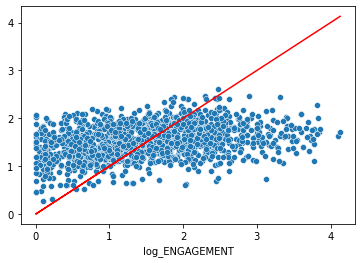

In [292]:
y_test_pred = knn_model_1.predict(X_test)
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_test, y_test, 'r')

In [293]:
RMSE = mse(y_test, y_test_pred)**0.5
print('RMSE ', RMSE)

print('r2_score: ', round(r2_score(y_test, y_test_pred)*100, 2))

RMSE  0.8425932774346592
r2_score:  8.5


## Scaled MaxAbsScaler model

In [294]:
my_scaler = MaxAbsScaler().fit(X_train)
X_train_scaled = pd.DataFrame(my_scaler.transform(X_train), columns=X_train.columns)
X_train_scaled.head()

,FOLLOWER,TIME,COMMENT_DISABLED,IS_VIDEO,HAS_AUDIO,VIDEO_VIEW_COUNT,YEAR,MONTH,DAY,DAYOFWEEK,HOUR,MINUTE,USERNAME_OBJECT_AS_INT,URL_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_OBJECT_AS_INT,CAPTION_OBJECT_AS_INT,LOCATION_OBJECT_AS_INT,CITY_OBJECT_AS_INT,COUNTRY_OBJECT_AS_INT,IMAGE_LABELS_OBJECT_AS_INT,CAPTION_INTEREST_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT,IMAGE_LABEL_INTEREST_OBJECT_AS_INT
0,0.000316,0.994694,0.0,1.0,1.0,0.000426,1.0,0.500000,0.451613,0.000000,0.565217,0.457627,0.543312,0.356831,0.0,0.345868,0.578616,0.618182,0.686275,0.087115,0.057143,0.0,0.90625
1,0.000140,0.999946,0.0,1.0,1.0,0.000263,1.0,0.750000,0.677419,0.166667,0.782609,0.881356,0.650560,0.977786,0.0,0.270873,0.578616,0.618182,0.686275,0.776563,0.628571,0.0,0.90625
2,0.000077,0.995069,0.0,1.0,1.0,0.000149,1.0,0.500000,0.677419,0.000000,0.652174,0.542373,0.121391,0.413853,0.0,0.846399,0.578616,0.618182,0.686275,0.606707,0.800000,0.0,0.68750
3,0.000026,0.999665,0.0,1.0,1.0,0.000321,1.0,0.750000,0.516129,0.500000,0.478261,0.423729,0.309369,0.674655,0.0,0.488634,0.578616,0.618182,0.686275,0.264443,0.742857,0.0,0.06250
4,0.000035,0.992378,0.0,1.0,1.0,0.000096,1.0,0.416667,0.032258,0.833333,0.826087,0.525424,0.820271,0.226517,0.0,0.619928,0.578616,0.618182,0.686275,0.209222,0.000000,0.0,0.81250


In [295]:
knn_model_2 = KNeighborsRegressor(n_neighbors=10).fit(X_train_scaled, y_train)

In [296]:
y_train_pred = knn_model_2.predict(X_train_scaled)

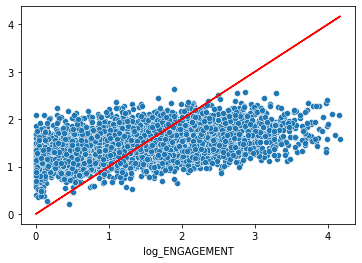

In [297]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')

In [298]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

0.785189907203559

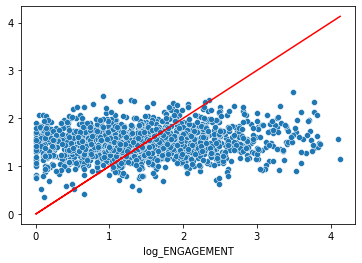

In [299]:
X_test_scaled = my_scaler.transform(X_test)
y_test_pred = knn_model_2.predict(X_test_scaled)

ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_test, y_test, 'r')

In [300]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

0.8859562445408047

## Appling 2nd Model - Decision Tree with bins

In [301]:
model_2_dt = DecisionTreeClassifier(
    min_samples_leaf=3
    ,max_depth=5
    )

In [302]:
model_2_dt.fit(X, 
              y_ENGAGEMENT_RANK_INT)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [303]:
class_list = [str(x) for x in model_2_dt.classes_]
class_list

['0', '1', '2', '3', '4']

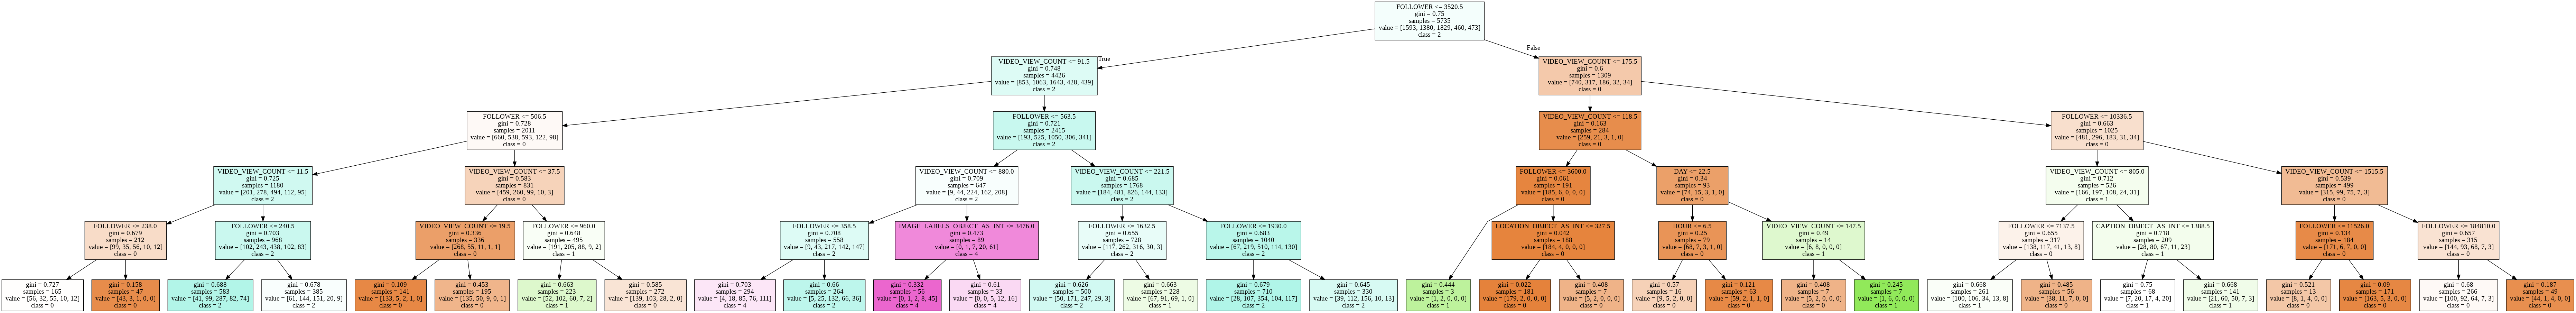

In [304]:
dot_data = StringIO()  
export_graphviz(model_2_dt, out_file=dot_data, feature_names=X.columns, 
                leaves_parallel=True, filled=True, class_names=[str(x) for x in model_2_dt.classes_])
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png(), width=1000) 

View Features Emportance:

In [305]:
pd.Series(model_2_dt.feature_importances_*100,
          index=X.columns).sort_values(ascending=False).round()

FOLLOWER                                        59.0
VIDEO_VIEW_COUNT                                39.0
DAY                                              1.0
CAPTION_OBJECT_AS_INT                            1.0
IMAGE_LABELS_OBJECT_AS_INT                       0.0
HOUR                                             0.0
LOCATION_OBJECT_AS_INT                           0.0
TIME                                             0.0
COMMENT_DISABLED                                 0.0
IS_VIDEO                                         0.0
HAS_AUDIO                                        0.0
YEAR                                             0.0
MONTH                                            0.0
IMAGE_LABEL_INTEREST_OBJECT_AS_INT               0.0
DAYOFWEEK                                        0.0
ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT     0.0
USERNAME_OBJECT_AS_INT                           0.0
URL_OBJECT_AS_INT                                0.0
ACCESSIBILITY_CAPTION_OBJECT_AS_INT           

Eladk 2021-Sep-24 comment in first model:

*   Why Time is So meaning full?
*   What ACCESSIBILITY_CAPTION have corolation with ranking?
*   I Need to understand why folloer is very meaningfull
*   I Need to understand why USERNAME,userid is very meaningfull

In [306]:
df.head(3)

,USERNAME,FOLLOWER,LIKES,COMMENTS,ENGAGEMENT,URL,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE_LABELS,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,IMAGE_LABEL_INTEREST,COMMENT_DISABLED,IS_VIDEO,HAS_AUDIO,VIDEO_VIEW_COUNT,log_ENGAGEMENT,DATETIME,YEAR,MONTH,DAY,DAYOFWEEK,HOUR,MINUTE,LIKES_RANK,COMMENTS_RANK,ENGAGEMENT_RANK,LIKES_RANK_INT,COMMENTS_RANK_INT,ENGAGEMENT_RANK_INT,USERNAME_OBJECT_AS_INT,URL_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_OBJECT_AS_INT,CAPTION_OBJECT_AS_INT,LOCATION_OBJECT_AS_INT,CITY_OBJECT_AS_INT,COUNTRY_OBJECT_AS_INT,IMAGE_LABELS_OBJECT_AS_INT,CAPTION_INTEREST_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT,IMAGE_LABEL_INTEREST_OBJECT_AS_INT
LINE_NUM_INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
37786,ben.sapsford,555,335,19,63.78,https://www.instagram.com/p/CR6w2xjhKjn,Null,"The perfect ride, everything was just bang on! ????☀️????\n\nDropping down the Ranger path on Snowdon with @_mattefinish_ \n•\n•\n@yeticyclesuk @totalmtb @goprouk \n•\n•\n•\n#snowdonrangerpath #YetiCyclesUK #YetiCycles #YetiFan #mtn_bike_geek #ukmtb #mtbtrails #mtbcommunity #mtbadventures #british_adventure #mtbgram #mtbenduro #ridemoremtb #ridemorebikes #wheremybiketakesme #gopromtb #goprouk",Snowdon,na,United Kingdom,1627577786,"Bicycle, Bike, Vehicle, Transportation, Person, Human, Mountain Bike, Outdoors, Adventure, Leisure Activities, Slope, Bow, Nature",music,Null,travel,0,1,1,1212.0,4.170997,2021-07-29 16:56:26,2021,7,29,3,16,56,Very High,High,Extreme,3,2,4,220.0,2644.0,0.0,3631.0,358.0,330.0,48.0,169.0,25.0,0.0,31.0
8851,addey_rathor,207,128,2,62.80,https://www.instagram.com/p/CTT8rCTD21V,Null,Manjeele milti nhi...????????\n#feel #lovestorysma #lnstagram,Null,Null,Null,1630569501,"Clothing, Apparel, Person, Human, Face, Shorts, Plant, Grass, Pants, Boy, Tree, Outdoors, Portrait, Photography, Photo, Footwear, Shoe, Man, T-Shirt, Hat, Kid, Child, Housing, Building, Cap, Yard, Nature",music,Null,style_fashion,0,1,1,31.0,4.155753,2021-09-02 07:58:21,2021,9,2,3,7,58,High,Medium,Extreme,2,1,4,65.0,4394.0,0.0,2649.0,276.0,204.0,35.0,624.0,25.0,0.0,29.0
12920,jpadesignco,116,45,26,61.21,https://www.instagram.com/p/CT7oocXrGwv,Null,"????????Today is launch day! ????????⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀\nI am so excited to announce the launch of my business, JPA Design Co! I am exclusively working with Interior Designers to provide brand strategy, branding visuals, and web design services!⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀\nMy website shows all of the details of how I can meet the needs and address the pain points designers are experiencing.⠀⠀⠀⠀⠀⠀⠀⠀⠀\nwww.jpadesignco.com⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀\nThis business has been a long time in the making and I am so excite",Null,Null,Null,1631901605,"Person, Human, Computer, Electronics, Screen, Monitor, Display, Pc, LCD Screen, Id Cards, Document, Text, Desktop, Clothing, Apparel",arts_entertainment,Null,technology_computing,0,1,1,134.0,4.130516,2021-09-17 18:00:05,2021,9,17,4,18,0,High,High,Extreme,2,2,4,793.0,4000.0,0.0,631.0,276.0,204.0,35.0,3336.0,2.0,0.0,30.0


In [307]:
df['ENGAGEMENT_RANK_INT_pred'] = model_2_dt.predict(X)
df.head(3)

,USERNAME,FOLLOWER,LIKES,COMMENTS,ENGAGEMENT,URL,ACCESSIBILITY_CAPTION,CAPTION,LOCATION,CITY,COUNTRY,TIME,IMAGE_LABELS,CAPTION_INTEREST,ACCESSIBILITY_CAPTION_INTEREST,IMAGE_LABEL_INTEREST,COMMENT_DISABLED,IS_VIDEO,HAS_AUDIO,VIDEO_VIEW_COUNT,log_ENGAGEMENT,DATETIME,YEAR,MONTH,DAY,DAYOFWEEK,HOUR,MINUTE,LIKES_RANK,COMMENTS_RANK,ENGAGEMENT_RANK,LIKES_RANK_INT,COMMENTS_RANK_INT,ENGAGEMENT_RANK_INT,USERNAME_OBJECT_AS_INT,URL_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_OBJECT_AS_INT,CAPTION_OBJECT_AS_INT,LOCATION_OBJECT_AS_INT,CITY_OBJECT_AS_INT,COUNTRY_OBJECT_AS_INT,IMAGE_LABELS_OBJECT_AS_INT,CAPTION_INTEREST_OBJECT_AS_INT,ACCESSIBILITY_CAPTION_INTEREST_OBJECT_AS_INT,IMAGE_LABEL_INTEREST_OBJECT_AS_INT,ENGAGEMENT_RANK_INT_pred
LINE_NUM_INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
37786,ben.sapsford,555,335,19,63.78,https://www.instagram.com/p/CR6w2xjhKjn,Null,"The perfect ride, everything was just bang on! ????☀️????\n\nDropping down the Ranger path on Snowdon with @_mattefinish_ \n•\n•\n@yeticyclesuk @totalmtb @goprouk \n•\n•\n•\n#snowdonrangerpath #YetiCyclesUK #YetiCycles #YetiFan #mtn_bike_geek #ukmtb #mtbtrails #mtbcommunity #mtbadventures #british_adventure #mtbgram #mtbenduro #ridemoremtb #ridemorebikes #wheremybiketakesme #gopromtb #goprouk",Snowdon,na,United Kingdom,1627577786,"Bicycle, Bike, Vehicle, Transportation, Person, Human, Mountain Bike, Outdoors, Adventure, Leisure Activities, Slope, Bow, Nature",music,Null,travel,0,1,1,1212.0,4.170997,2021-07-29 16:56:26,2021,7,29,3,16,56,Very High,High,Extreme,3,2,4,220.0,2644.0,0.0,3631.0,358.0,330.0,48.0,169.0,25.0,0.0,31.0,4
8851,addey_rathor,207,128,2,62.80,https://www.instagram.com/p/CTT8rCTD21V,Null,Manjeele milti nhi...????????\n#feel #lovestorysma #lnstagram,Null,Null,Null,1630569501,"Clothing, Apparel, Person, Human, Face, Shorts, Plant, Grass, Pants, Boy, Tree, Outdoors, Portrait, Photography, Photo, Footwear, Shoe, Man, T-Shirt, Hat, Kid, Child, Housing, Building, Cap, Yard, Nature",music,Null,style_fashion,0,1,1,31.0,4.155753,2021-09-02 07:58:21,2021,9,2,3,7,58,High,Medium,Extreme,2,1,4,65.0,4394.0,0.0,2649.0,276.0,204.0,35.0,624.0,25.0,0.0,29.0,2
12920,jpadesignco,116,45,26,61.21,https://www.instagram.com/p/CT7oocXrGwv,Null,"????????Today is launch day! ????????⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀\nI am so excited to announce the launch of my business, JPA Design Co! I am exclusively working with Interior Designers to provide brand strategy, branding visuals, and web design services!⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀\nMy website shows all of the details of how I can meet the needs and address the pain points designers are experiencing.⠀⠀⠀⠀⠀⠀⠀⠀⠀\nwww.jpadesignco.com⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀\nThis business has been a long time in the making and I am so excite",Null,Null,Null,1631901605,"Person, Human, Computer, Electronics, Screen, Monitor, Display, Pc, LCD Screen, Id Cards, Document, Text, Desktop, Clothing, Apparel",arts_entertainment,Null,technology_computing,0,1,1,134.0,4.130516,2021-09-17 18:00:05,2021,9,17,4,18,0,High,High,Extreme,2,2,4,793.0,4000.0,0.0,631.0,276.0,204.0,35.0,3336.0,2.0,0.0,30.0,4


In [308]:
s = pd.Series(model_2_dt.feature_importances_*100,
          index=X.columns).sort_values(ascending=False)

s[s.gt(0)]

FOLLOWER                      59.425667
VIDEO_VIEW_COUNT              38.734844
DAY                            0.536345
CAPTION_OBJECT_AS_INT          0.514683
IMAGE_LABELS_OBJECT_AS_INT     0.364481
HOUR                           0.315182
LOCATION_OBJECT_AS_INT         0.108799
dtype: float64

In [309]:
# map_dict_ENGAGEMENT = dict(zip(df.ENGAGEMENT_RANK_INT,df.ENGAGEMENT_RANK))
# map_dict_ENGAGEMENT

In [310]:
#df['ENGAGEMENT_RANK_pred'] = df['ENGAGEMENT_RANK_INT_pred'].map(map_dict_ENGAGEMENT)

Evanuating the Model:

In [311]:
#type(df[['ENGAGEMENT_RANK','ENGAGEMENT_RANK_pred']].value_counts())

In [312]:
df[['ENGAGEMENT_RANK_INT','ENGAGEMENT_RANK_INT_pred']].value_counts().sort_index()

ENGAGEMENT_RANK_INT  ENGAGEMENT_RANK_INT_pred
0                    0                           1116
                     1                            249
                     2                            224
                     4                              4
1                    0                            316
                     1                            387
                     2                            658
                     4                             19
2                    0                            180
                     1                            230
                     2                           1327
                     4                             92
3                    0                             21
                     1                             32
                     2                            311
                     4                             96
4                    0                             16
                     1              

In [313]:
#df[['ENGAGEMENT_RANK','ENGAGEMENT_RANK_pred']].value_counts().sort_index()

In [314]:
cm = confusion_matrix(y_true=df.ENGAGEMENT_RANK_INT,
                      y_pred=df.ENGAGEMENT_RANK_INT_pred)
pd.DataFrame(cm,
             index=model_2_dt.classes_,
             columns=model_2_dt.classes_)

,0,1,2,3,4
0,1116,249,224,0,4
1,316,387,658,0,19
2,180,230,1327,0,92
3,21,32,311,0,96
4,16,33,252,0,172


In [315]:
print(classification_report(y_true=df.ENGAGEMENT_RANK_INT,
                      y_pred=df.ENGAGEMENT_RANK_INT_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1593
           1       0.42      0.28      0.33      1380
           2       0.48      0.73      0.58      1829
           3       0.00      0.00      0.00       460
           4       0.45      0.36      0.40       473

    accuracy                           0.52      5735
   macro avg       0.40      0.41      0.40      5735
weighted avg       0.48      0.52      0.49      5735



In [316]:
accuracy_score(y_true=df.ENGAGEMENT_RANK_INT, y_pred=df.ENGAGEMENT_RANK_INT_pred)

0.5234524847428074

In [317]:
s = pd.Series(model_2_dt.feature_importances_*100,
          index=X.columns).sort_values(ascending=False)

s[s.gt(0)]

FOLLOWER                      59.425667
VIDEO_VIEW_COUNT              38.734844
DAY                            0.536345
CAPTION_OBJECT_AS_INT          0.514683
IMAGE_LABELS_OBJECT_AS_INT     0.364481
HOUR                           0.315182
LOCATION_OBJECT_AS_INT         0.108799
dtype: float64

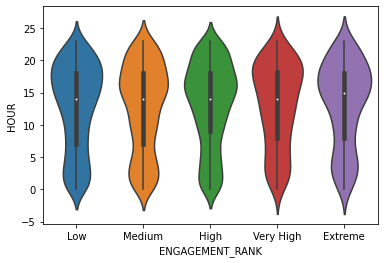

In [318]:
p = sns.violinplot(x='ENGAGEMENT_RANK', y='HOUR', 
                    #order=cut_order, 
                    data=df)

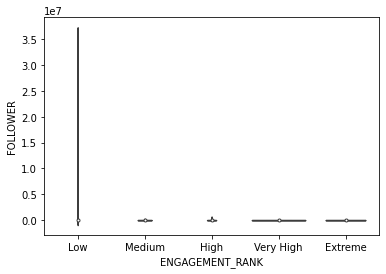

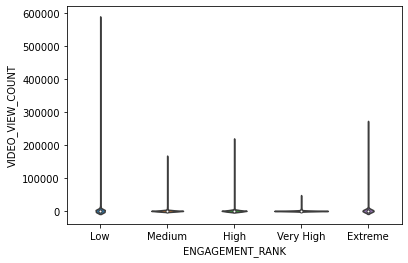

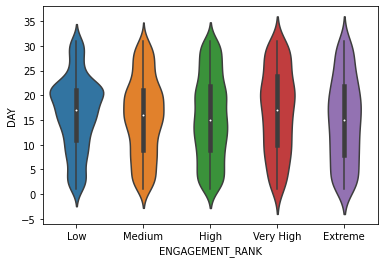

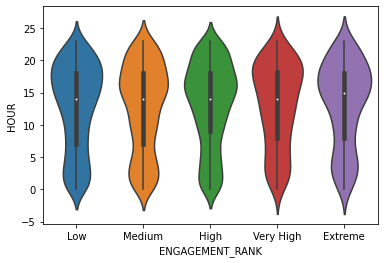

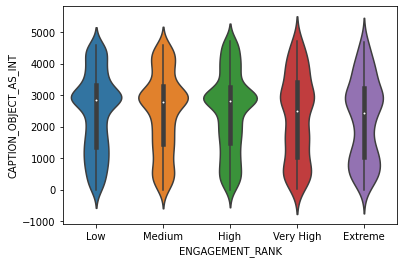

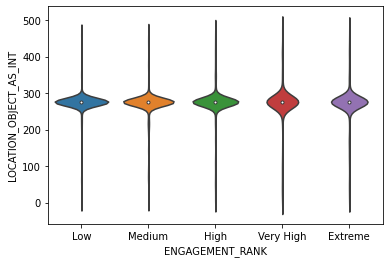

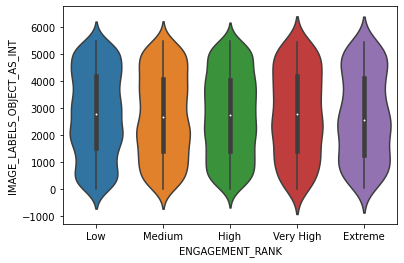

In [319]:
for index, val in pd.Series(model_2_dt.feature_importances_*100,index=X.columns).iteritems():
  if val > 0:
    plt.figure()
    p = sns.violinplot(x='ENGAGEMENT_RANK', y=index, 
                    #order=cut_order, 
                    data=df)
    

## Scoring 

## Appling 3nd Model - Random Forest regression

In [320]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = rand_state)
# Train the model on training data
rf.fit(X_train, y_train);

In [321]:
# Use the forest's predict method on the test data
rf_predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(rf_predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'log_of_enegament.')

Mean Absolute Error: 0.38 log_of_enegament.


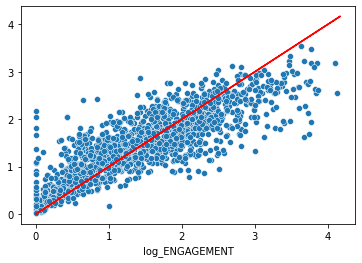

In [322]:
ax = sns.scatterplot(x=y_test, y=rf_predictions)
ax.plot(y_train, y_train, 'r')

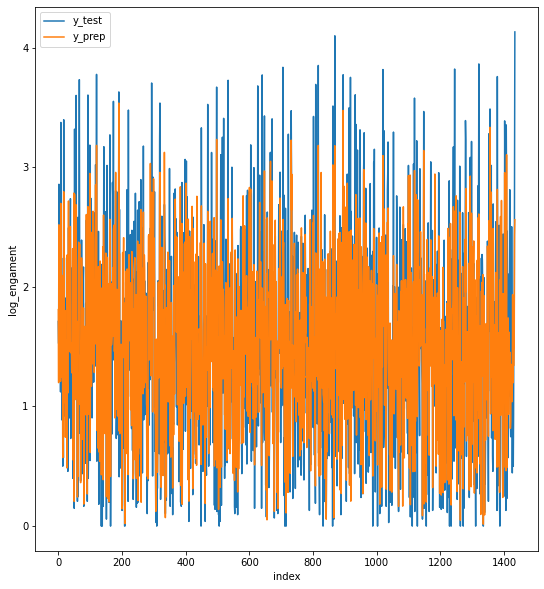

In [323]:
x = np.linspace(0, len(y_test), len(y_test))
fig = plt.figure(figsize=(9, 10))
plt.plot(x, y_test, label='y_test')
plt.plot(x, rf_predictions, label='y_prep')
plt.xlabel('index')
plt.ylabel('log_engament')
plt.legend()
plt.show()

In [324]:
rf_y_train_pred = rf.predict(X_train)
RMSE = mse(y_train, rf_y_train_pred)**0.5
RMSE

0.1791917875031925

In [325]:
rf_y_test_pred = rf.predict(X_test)
RMSE = mse(y_test, rf_y_test_pred)**0.5
RMSE


0.5041126003248227

In [326]:
pd.Series(rf.feature_importances_, index=X_train.columns).\
sort_values(ascending=False)

FOLLOWER                                        0.377909
VIDEO_VIEW_COUNT                                0.304683
USERNAME_OBJECT_AS_INT                          0.051667
TIME                                            0.034682
IMAGE_LABELS_OBJECT_AS_INT                      0.031493
CAPTION_OBJECT_AS_INT                           0.029492
URL_OBJECT_AS_INT                               0.025930
MINUTE                                          0.025555
HOUR                                            0.021755
DAY                                             0.020755
CAPTION_INTEREST_OBJECT_AS_INT                  0.020095
IMAGE_LABEL_INTEREST_OBJECT_AS_INT              0.017363
DAYOFWEEK                                       0.013114
MONTH                                           0.009820
LOCATION_OBJECT_AS_INT                          0.004470
CITY_OBJECT_AS_INT                              0.004291
COUNTRY_OBJECT_AS_INT                           0.003357
HAS_AUDIO                      

In [327]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 990,
 'verbose': 0,
 'warm_start': False}


In [328]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [329]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)
#Model Performance
#Average Error: 3.6561 degrees.
#Accuracy = 93.83%.
#print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))
#Improvement of 0.50%.

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.3min


In [ ]:
grid_search.best_params_

## Appling 4nd Model - Random Forest Classification 

In [ ]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y_ENGAGEMENT_RANK_INT, train_size = train_size\
                           , random_state = rand_state)#, stratify = df.ENGAGEMENT)

In [ ]:
X_train_4.drop(columns='VIDEO_VIEW_COUNT', inplace=True)
X_test_4.drop(columns='VIDEO_VIEW_COUNT', inplace=True)

In [ ]:
X_train_4.columns

In [ ]:
model_rf_4 = RandomForestClassifier()

model_rf_4.fit(X_train_4,y_train_4) # X_test_4 is Engagment_rank
preds= model_rf_4.predict_proba(X_train_4)[:,1]

#roc_auc_score(y_test_4,preds)

In [ ]:
# map_dict_ENGAGEMENT = dict(zip(df.ENGAGEMENT_RANK_INT,df.ENGAGEMENT_RANK))

In [ ]:
pd.Series(model_rf_4.feature_importances_*100, index=X_train_4.columns).sort_values(ascending=False).round()#.plot.barh(figsize=(14,12))

In [ ]:
from sklearn import tree

In [ ]:
import six

In [ ]:
_ = tree.plot_tree(model_rf_4.estimators_[0], feature_names=X_train_4.columns, filled=True)

In [ ]:
X_train_4.columns

In [ ]:
X_train_4.head(3)

In [ ]:
X_train_4['y_ENGAGEMENT_RANK_INT_pred_rf'] = model_rf_4.predict(X_train_4)

In [ ]:
X_train_4.head(3)

In [ ]:
X_train_4 = pd.concat([X_train_4, y_train_4], axis=1).reset_index()

In [ ]:
X_train_4.head(3)

In [ ]:
print(len(X_train_4))

In [ ]:
len(X_train_4[X_train_4.y_ENGAGEMENT_RANK_INT_pred_rf == X_train_4.ENGAGEMENT_RANK_INT])

In [ ]:
cm = confusion_matrix(y_true=y_train_4,
                      y_pred=X_train_4['y_ENGAGEMENT_RANK_INT_pred_rf'])
pd.DataFrame(cm,
             index=model_rf_4.classes_,
             columns=model_rf_4.classes_)

In [ ]:
X_train_4.columns

In [ ]:
print(classification_report(y_true=y_train_4,
                      y_pred=X_train_4.y_ENGAGEMENT_RANK_INT_pred_rf))

**WTF!!!**

In [ ]:
print(classification_report(y_true=df.ENGAGEMENT_RANK_INT,
                      y_pred=df.ENGAGEMENT_RANK_INT_pred))

In [ ]:
X_test_4.columns

In [ ]:
X_test_4.head(3)

In [ ]:
X_test_4['y_ENGAGEMENT_RANK_INT_pred'] = model_rf_4.predict(X_test_4)

In [ ]:
X_test_4.head(3)

In [ ]:
#pd.concat([X_test_4, df4.reindex(df1.index)], axis=1)
X_test_4 = pd.concat([X_test_4, y_test_4], axis=1).reindex(X_test_4.index)

In [ ]:
X_test_4.head(3)

In [ ]:
X_test_4[['ENGAGEMENT_RANK_INT','y_ENGAGEMENT_RANK_INT_pred']].value_counts().sort_index()

In [ ]:
cm = confusion_matrix(y_true=X_test_4.ENGAGEMENT_RANK_INT,
                      y_pred=X_test_4.y_ENGAGEMENT_RANK_INT_pred)
pd.DataFrame(cm,
             index=model_2_dt.classes_,
             columns=model_2_dt.classes_)

In [ ]:
print(classification_report(y_test_4,
                      y_pred=X_test_4.y_ENGAGEMENT_RANK_INT_pred))

Visualize the Random Forest:

In [ ]:
# dotfile = six.StringIO()
# i_tree = 0
# for tree_in_forest in model_rf_4.estimators_:
#   if (i_tree <1):        
#       export_graphviz(model_rf_4,
#                   feature_names=X_train_4.columns,
#                   filled=True,
#                   rounded=True)
#       pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png('dtree'+ str(i_tree) +'.png')
#       i_tree = i_tree + 1

## Appling 4nd Model - XGBoost regression


In [ ]:
XGB_reg = xgb.XGBRegressor()

In [ ]:
print(XGB_reg)

In [ ]:
XGB_reg.fit(X_train, y_train)

In [ ]:
score = XGB_reg.score(X_train, y_train)  
print("Training score: ", score)

In [ ]:
scores = cross_val_score(XGB_reg, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

In [ ]:
y_test_pred = XGB_reg.predict(X_test)
mse = mse(y_test, y_test_pred)
score_test = XGB_reg.score(X_test, y_test)  
print("Training score: ", score_test)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**0.5))


In [ ]:
x_ax = range(len(y_test))
fig = plt.figure(figsize=(9, 10))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

In [ ]:
XGB_param_grid = {'colsample_bytree': [0.3, 0.7, 1.0, 1.2],
    'n_estimators': [50,100,200],    'max_depth': [2,3,4]
}
XGB_reg_grid = xgb.XGBRegressor()
grid_mse = GridSearchCV(param_grid=XGB_param_grid, estimator=XGB_reg_grid, 
                        scoring='neg_mean_squared_error', cv=4, verbose=1)
grid_mse.fit(X, y)
# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))